In [6]:
import matplotlib.pyplot as plot
import numpy as np

In [7]:
from public import NDsort
def interp(fitness_,x = 3):
    # FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    # FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    # fitness_ = fitness_[FrontValue_1_index]
    
    fitness_[:,0] = 1/fitness_[:,0]
    for i in range(1,x):
        fitness_ = np.vstack((fitness_,fitness_*(40+i)/(x+41)))
    fitness_[:,0] = 1/fitness_[:,0]
    
    FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    fitness_ = fitness_[FrontValue_1_index]
    print(len(fitness_))
    return fitness_

16
[[1.         2.        ]
 [1.12195122 1.7826087 ]
 [1.0952381  1.82608696]
 [1.22880372 1.62759924]
 [1.06976744 1.86956522]
 [1.20022689 1.66635161]
 [1.17165006 1.70699433]
 [1.31453421 1.52145147]
 [1.04545455 1.91304348]
 [1.172949   1.70510397]
 [1.14502165 1.74669187]
 [1.28465843 1.55683406]
 [1.11839323 1.78827977]
 [1.25478265 1.59390154]
 [1.22490688 1.63277718]
 [1.37428576 1.4553014 ]]


/home/wangmo/enter/envs/nn/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


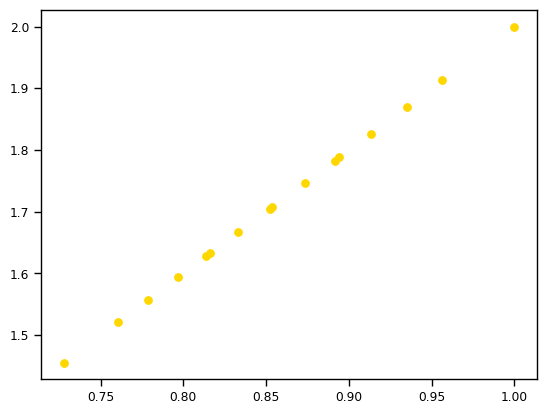

In [8]:
a = np.array([[1,2],[3,4]])
a = interp(a,5)
print(a)
plt.scatter(1/ a[:, 0], a[:, 1], s=30,  c='gold', marker='o', label='Thalamus' ) #: '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.show()

In [9]:
def rank_dense(x):

    print(x)
    length = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0 or i == len(x)-1:
            length[i] = 999
        else: 
            length[i] = x[i+1] - x[i-1]
    return -length
        

In [10]:
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index
            
            
        

In [11]:
x = np.array([2,1,3,45,6,4,46])
index = np.argsort(x)
x = x[index]  
print(x)

index = np.argsort(rank_dense(x))
print(rank_dense(x))
print(index)
print(x[index[:]])

[ 1  2  3  4  6 45 46]
[ 1  2  3  4  6 45 46]
[ 1  2  3  4  6 45 46]
[-999.   -2.   -2.   -3.  -41.  -40. -999.]
[0 6 4 5 3 1 2]
[ 1 46  6 45  4  2  3]


FileNotFoundError: [Errno 2] No such file or directory: '/home/ncclab306/zfs-pool/tes/mopso/img_focality/avoid4_pareto_fitness_hippo_hcp4.txt'

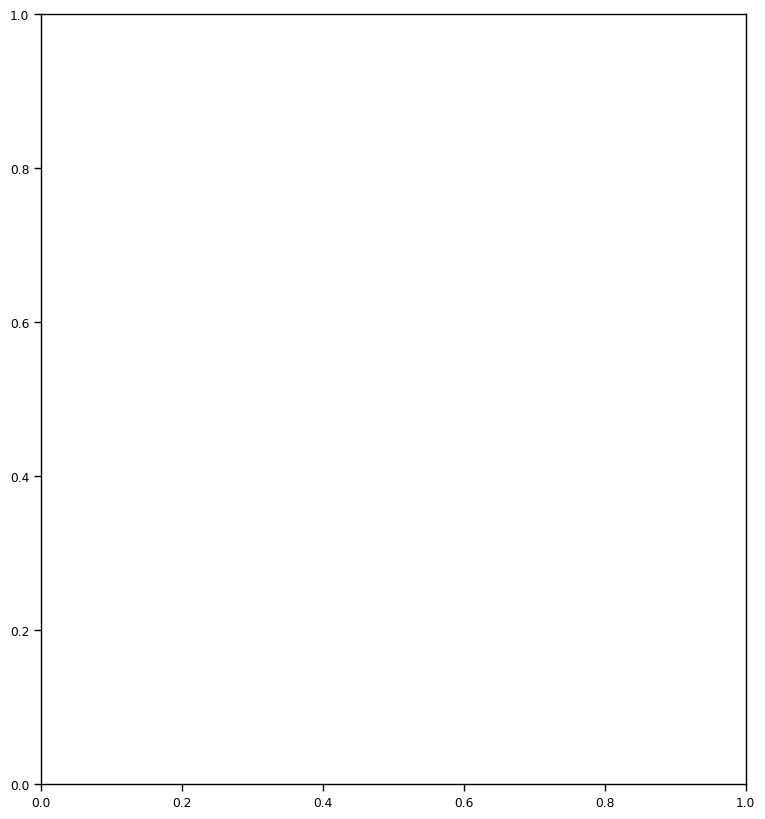

In [12]:
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp4'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)

plt.subplot(121)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_focality/avoid4_pareto_fitness_hippo_hcp4.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/1000_pareto_fitness_dlpfc_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')





gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid_pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_focality/avoid10_pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=30,  c='r', marker='v', label='tACS : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='r')


data = np.array([[3.83693197, 0.10364698],
 [3.58629299,0.14730758],
 [6.1937331 , 0.07152598],
 [2.92340486, 0.20148402],
 [5.98603524, 0.08299445],
 [5.23710542 ,0.09191973],
 [6.65815033, 0.06558093],
 [8.50355019, 0.05264593],
 [4.77586089, 0.1025737 ],
 [5.3530713,  0.08332001],
 [8.35118939, 0.05413587],
 [6.30076661, 0.06801008],
 [6.69315364, 0.05821173],
 [7.08225416, 0.0545287 ],
 [6.08279622 ,0.07428656],
 [8.69866553, 0.04392188],
 [3.82861262, 0.14283654],
 [4.94993063, 0.09422119],
 [3.10541703, 0.14810837],
 [7.48747164 ,0.05430652],
 [2.90481189 ,0.2067885 ]])
# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/mopso/img_focality/1000pareto_fitness_hippo_ernie1.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=30,  c='r', marker='v', label='tACS : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='r')


plt.scatter([0.542,0.4,0.33,0.48],[0.172,0.1,0.073,0.12], s=60,  c='black', marker='x', label='tACS_SimNIBS')
plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title(' Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
plt.ylim(0, 0.25, 0.05)
plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)

plt.subplot(122)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.scatter([0.542,0.4,0.33,0.48],[0.172,0.1,0.073,0.12], s=60,  c='black', marker='x', label='tACS_SimNIBS')
plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title(' Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
plt.ylim(0, 0.25, 0.05)
plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)


# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


23243
[[False False False ... False False False]]
3931
[[False False False ...  True False False]]


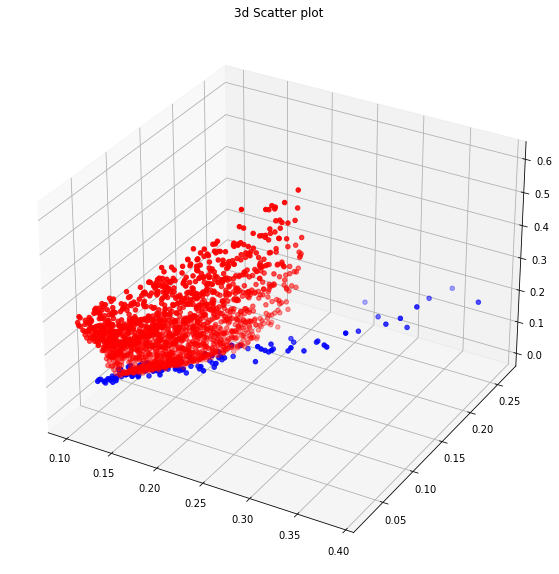

In [ ]:
from mpl_toolkits import mplot3d

from public import NDsort
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
#创建绘图区域
ax = plt.axes(projection='3d')
#构建xyz

gt_data = []
f2 = open(r"fitness.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)


index = np.where(data > 10)
#print(index)
data = np.delete(data,index,axis=0)
print(len(data))
#print(NDsort.NDSort(data, data.shape[0])[0]==1)

front_index = NDsort.NDSort(data, data.shape[0])[0]==1
print(front_index)
data = data[front_index[0]]

x,y,z = 1/data[:,0],data[:,1],data[:,2]


ax.scatter3D(x, y, z ,c = 'r')

gt_data = []
f2 = open(r"fitness_ti.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)


index = np.where(data > 10)
#print(index)
data = np.delete(data,index,axis=0)
print(len(data))
#print(NDsort.NDSort(data, data.shape[0])[0]==1)

front_index = NDsort.NDSort(data, data.shape[0])[0]==1
print(front_index)
data = data[front_index[0]]

x,y,z = 1/data[:,0],data[:,1],data[:,2]


ax.scatter3D(x, y, z ,c = 'b')
ax.set_title('3d Scatter plot')
plt.show()
plt.ion()



In [ ]:
%matplotlib qt

ImportError: Cannot load backend 'Qt5Agg' which requires the 'qt' interactive framework, as 'headless' is currently running

500
500


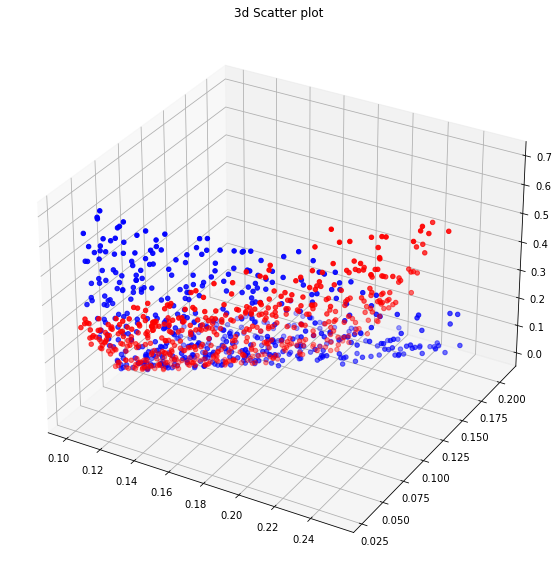

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
#创建绘图区域
ax = plt.axes(projection='3d')
#构建xyz

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/3obj/31_pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
print(len(data))
x,y,z = 1/data[:,0],data[:,1],data[:,2]


ax.scatter3D(x, y, z ,c = 'b')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/3obj/32_pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
print(len(data))
x,y,z = 1/data[:,0],data[:,1],data[:,2]


ax.scatter3D(x, y, z ,c = 'r')

ax.set_title('3d Scatter plot')
plt.show()



269
69


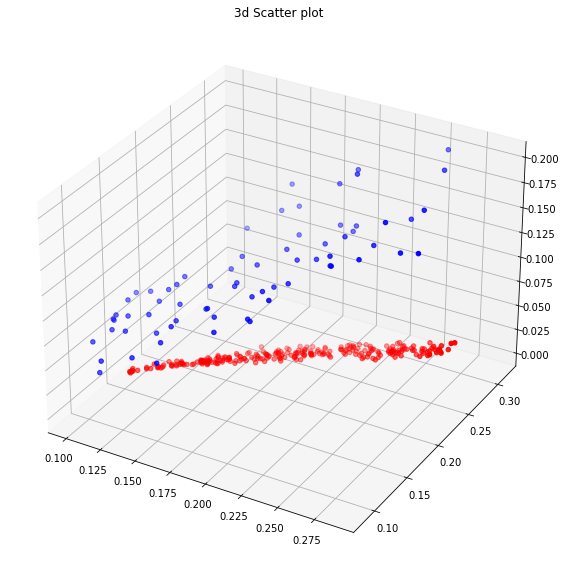

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
#创建绘图区域
ax = plt.axes(projection='3d')
#构建xyz
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/3obj/3_pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
print(len(data))
x,y,z = 1/data[:,0],1/data[:,1],data[:,2]


ax.scatter3D(x, y, z ,c = 'r')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/3obj/31_pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
print(len(data))
x,y,z = 1/data[:,0],1/data[:,1],data[:,2]


ax.scatter3D(x, y, z ,c = 'b')
ax.set_title('3d Scatter plot')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp4'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)

plt.subplot(121)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_focality/avoid2_pareto_fitness_hippo_hcp4.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/1000_pareto_fitness_dlpfc_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pall_pareto_in_pallidum_mni152.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b')


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_focality/avoid4_pareto_fitness_dlpfc_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=30,  c='r', marker='v', label='tACS : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='r')

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/mopso/img_focality/1000pareto_fitness_hippo_ernie1.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index1 = np.argsort(1/data[:,0])
# index = cal_rank(1 / data[index1, 0],GAP)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=30,  c='r', marker='v', label='tACS : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index1,0],p(1/data[index1,0]),c='r')


plt.scatter([0.542,0.4,0.33,0.48],[0.172,0.1,0.073,0.12], s=60,  c='black', marker='x', label='tACS_SimNIBS')
plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title(' Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
# plt.xlim(0.09, 0.61, 0.08)
# plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)

plt.subplot(122)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.scatter([0.542,0.4,0.33,0.48],[0.172,0.1,0.073,0.12], s=60,  c='black', marker='x', label='tACS_SimNIBS')
plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title(' Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
plt.ylim(0, 0.25, 0.05)
plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)


# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


array([2, 3])

TypeError: cal_rank() missing 1 required positional argument: 'gap'

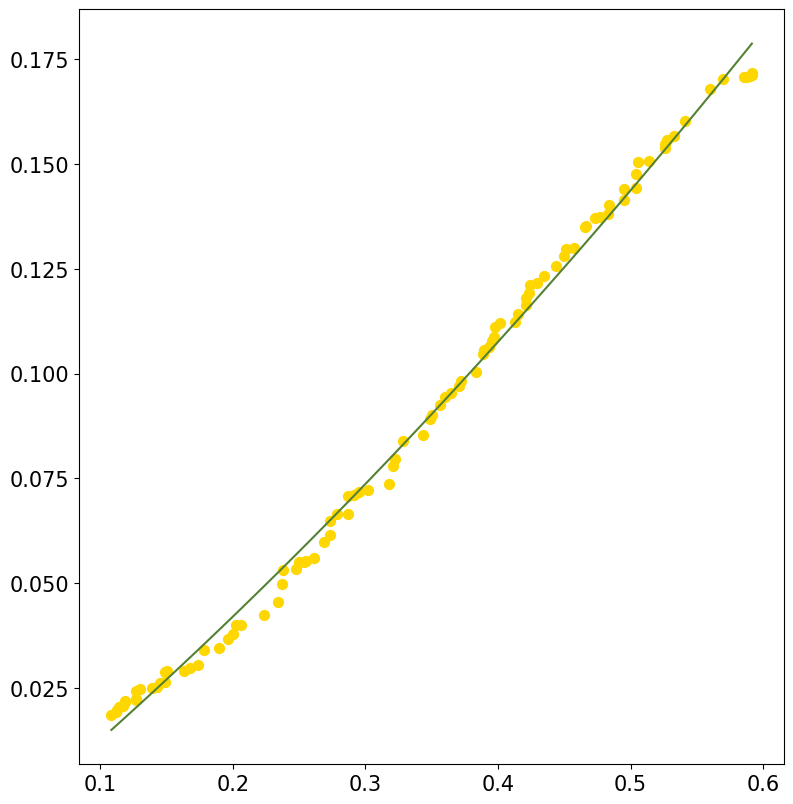

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

MODEL ='hcp4'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)

plt.subplot(121)

gt_data = []
f2 = open(r"img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
parameter = np.polyfit(1 / data[:, 0],data[:, 1],2)


plt.scatter(1/data[:, 0], data[:, 1],  c='gold', marker='.',s =200, label='DLPFC : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[:,0],p(1/data[:,0]),c='#548235')

index_2 = cal_rank(1 / data[:, 0])

plt.scatter(1/data[index_2[:50], 0], data[index_2[:50], 1],  c='#548235', marker='1', label='DLPFC : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
#print(x[index_2[:20]])


# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# parameter = np.polyfit(1 / data[:, 0],data[:, 1],2)

# plt.scatter(1/data[:, 0], data[:, 1],  c='red', s = 200, marker='.', label='DLPFC : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[:,0],p(1/data[:,0]),c='red')

# #
# plt.legend(loc='upper left', fontsize=12, markerscale=2)
# plt.title('tACS Optimization Results For '+MODEL,fontsize=20)
# plt.rcParams.update({'font.size': 15})
# plt.xlabel('Target Intensity (V/m)',fontsize=20)
# plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度
# plt.grid(True,linestyle = '--') # 不显示网格线

# ax = plt.gca()

# # ax.spines['right'].set_color('#ccc')
# # ax.spines['top'].set_color('#ccc')
# # ax.spines['left'].set_color('#ccc')
# # ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
# ax.spines['right'].set_linewidth('2.0')
# ax.spines['top'].set_linewidth('2.0')
# ax.spines['left'].set_linewidth('2.0')
# ax.spines['bottom'].set_linewidth('2.0')

# # plt.xlim(0.1, 0.5, 0.03)
# # plt.xticks(np.arange(0.1, 0.5, 0.08),size =10)
# # plt.ylim(0, 0.25, 0.05)
# # plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)

# t.subplots_adjust(wspace = 0.05)
# t.suptitle(MODEL)
# #t.savefig(MODEL+'_tdcs_mopso.png')
# plt.show()

In [ ]:
a = np.array([2,3,2,3,5,6])
a = np.where(a>4)

In [ ]:
print(a)


(array([4, 5]),)


In [ ]:
print("loading hcp4")
# grey and white matter
lfm = np.load(r'/media/ncclab306/database7/wangm/simnibs_leadfield/lfm_hcp4_2.npy')
print("load grey and white matter",lfm.shape)
#lfm = lfm[[0,1,2,9,11,13,15,17,31,33,36,38,52,54,56,58,60,69,70,71]]
# for train
pos = np.load(r'/media/ncclab306/database7/wangm/simnibs_leadfield/pos_hcp4_2.npy')
#pos = np.load('/mnt/database7/wangm/simnibs_leadfield/pos_269731_mni.npy')
print("load position")
print(pos.shape)

loading hcp4
load grey and white matter (75, 1467981, 3)
load position
(1467981, 3)


In [ ]:
position = [-39, 34, 37]
#[-31, -20, -14] #[47, -13, 52] #[-29,-19,-15] #[-29,-19,-15]#LEFT-HIPPO #[25,3,-1] paliidum #[41,-36,66] sensory #[25,42,37]dorsal # v1 [11,-94,0]   # MNI_coords #r_dkpfc [52, 38, 15] #motor [44, -18, 57]
distance = np.zeros(len(pos))
print(position)

for i in range(len(pos)):
    distance[i] = (pos[i, 0] - position[0])**2 + (pos[i, 1] - position[1])**2 + (pos[i, 2] - position[2])**2

# index = np.argmin(distance)
# TARGET_POSITION = index
TARGET_POSITION = np.where(distance < 10**2)
TARGET_POSITION = TARGET_POSITION[0]

In [ ]:
import math
NUM_ELE = 75 
def tis_constraint6(x):
    lst = [math.ceil(x[i] * NUM_ELE) for i in [2, 3, 4, 5]]
    set_lst = set(lst)
    if len(set_lst) == len(lst) and x[0] + x[1] <= 1 and x[0] > 0.1 and x[1] > 0.1:
        return True
    else:
        return False

def tis_function6(x):
    #print(x)
    eam = np.zeros(len(pos))
    electrode1 = int(round(x[2] * 74))
    electrode2 = int(round(x[3] * 74))
    stimulation1 = np.zeros(NUM_ELE)
    stimulation1[electrode1] = 2 * x[0]
    stimulation1[electrode2] = -(2 * x[0])
    e1 = np.array([np.matmul(lfm[:, :, 0].T, stimulation1), np.matmul(lfm[:, :, 1].T, stimulation1),np.matmul(lfm[:, :, 2].T, stimulation1)]).T /1000
    #print(np.max(e1))
    electrode3 = int(round(x[4] * 74))
    electrode4 = int(round(x[5] * 74))
    print(electrode1,electrode2,electrode3,electrode4,x[0],x[1])
    stimulation2 = np.zeros(NUM_ELE)
    # stimulation2[electrode3] = 1.5 - x[0]
    # stimulation2[electrode4] = -1.5 + x[0]
    stimulation2[electrode3] = 2 * x[1]
    stimulation2[electrode4] = -(2 * x[1])
    e2 = np.array([np.matmul(lfm[:, :, 0].T, stimulation2), np.matmul(lfm[:, :, 1].T, stimulation2),np.matmul(lfm[:, :, 2].T, stimulation2)]).T / 1000
    # t1 = e1 + e2
    # t2 = e1 - e2
    #
    #
    # for i in range(len(t1)):
    #     eam[i] = np.sqrt(t1[i].dot(t1[i])) - np.sqrt(t2[i].dot(t2[i]))
    for i in range(len(e1)):
        l_x = np.sqrt(e1[i].dot(e1[i]))
        l_y = np.sqrt(e2[i].dot(e2[i]))
        point = e1[i].dot(e2[i])
        cos_ = point/(l_x*l_y)
        #print(cos_)
        if cos_ <= 0:   # one of the fields must be flipped when a > 90 degrees
            e1[i] = -e1[i]
            cos_ = -cos_
        if l_y < l_x:
            if l_y < l_x * cos_:
                eam[i] = 2 * l_y
            else:
                eam[i] = 2 * np.linalg.norm(np.cross(e2[i], (e1[i] - e2[i]))) / np.linalg.norm(e1[i] - e2[i])
        else:
            if l_x < l_y * cos_:
                eam[i] = 2 * l_x
            else:
                eam[i] = 2 * np.linalg.norm(np.cross(e1[i], (e2[i] - e1[i]))) / np.linalg.norm(e2[i] - e1[i])
    #print(np.max(eam))


    return np.array([1 / np.average(np.abs(eam[TARGET_POSITION])), np.mean(eam)])  # ,eam[TARGET_AVOID]
#return np.array([1 / np.average(np.abs(eam[TARGET_POSITION])), np.mean(eam)])


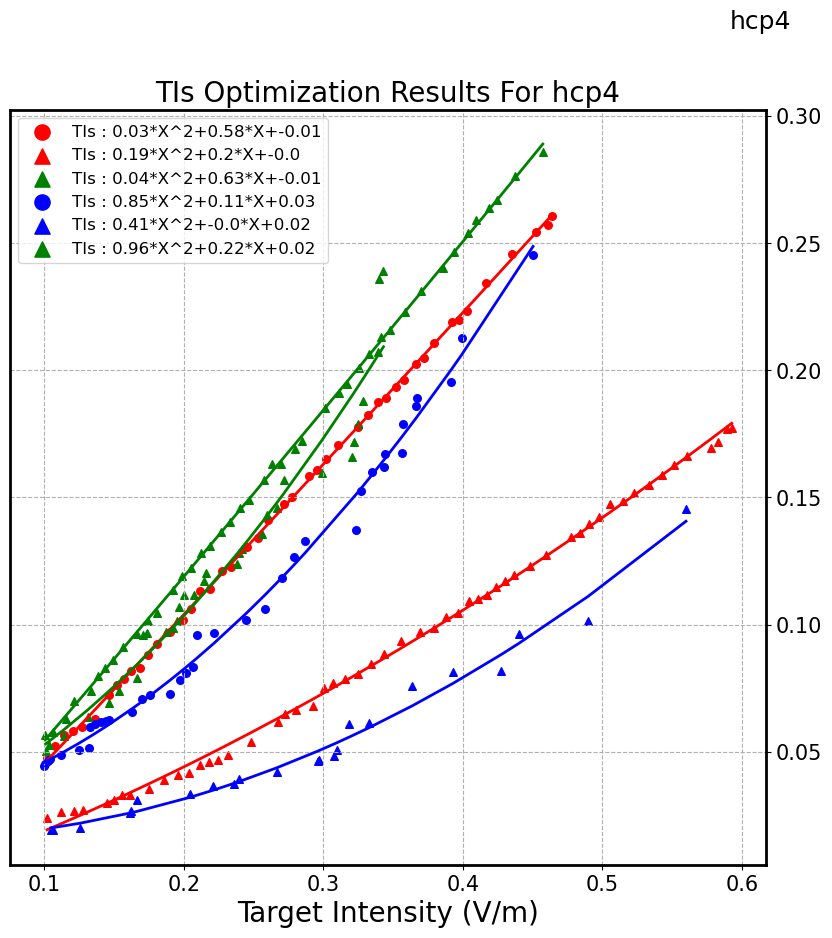

In [ ]:
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp4'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_pallidum_hcp4.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_hcp4.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='g', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='g',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_pallidum_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='g', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='g',linewidth = 2)


plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
# plt.xlim(0.09, 0.61, 0.08)
# plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)


# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


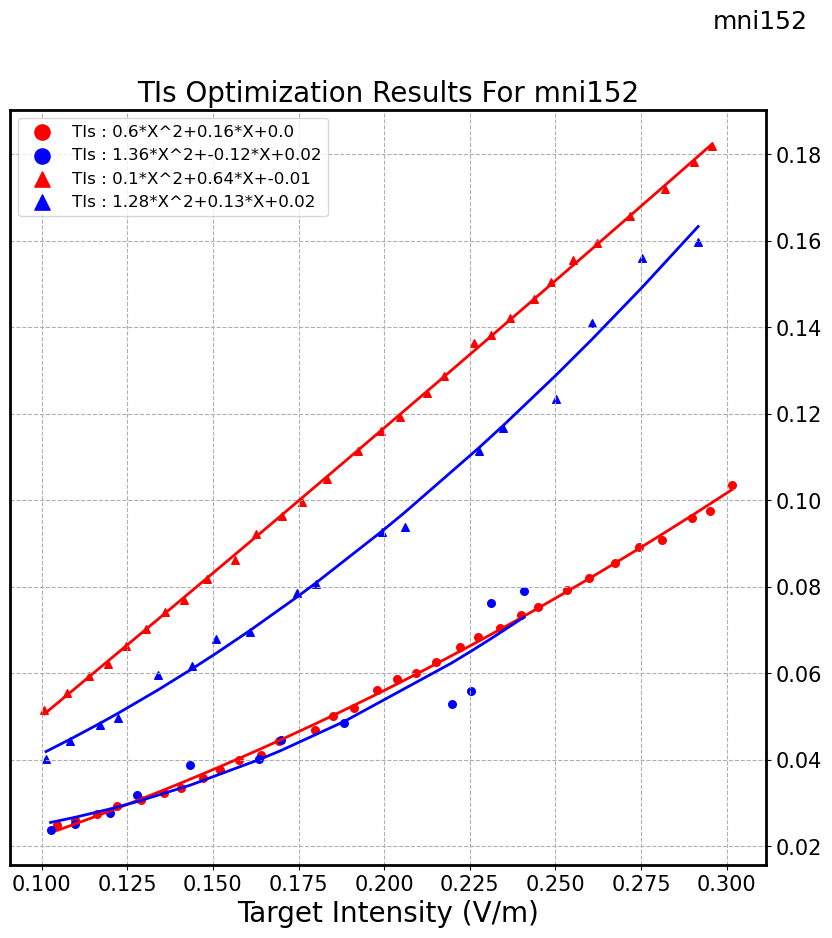

In [ ]:
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='mni152'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt2/pareto_fitness_dlpfc_mni152.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt2/pareto_fitness_pallidum_mni152.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pall_pareto_fitness_pallidum_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
# plt.xlim(0.09, 0.61, 0.08)
# plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)


# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


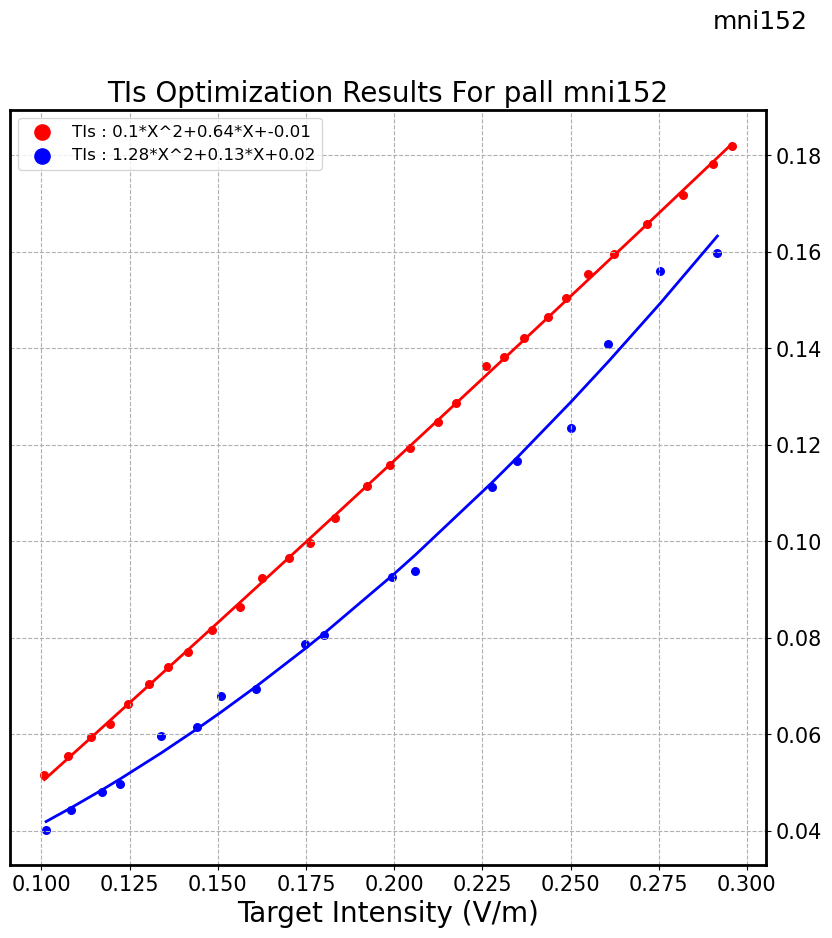

In [ ]:
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='mni152'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt2/pareto_fitness_pallidum_mni152.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pallpareto_fitness_pallidum_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)




plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For pall '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


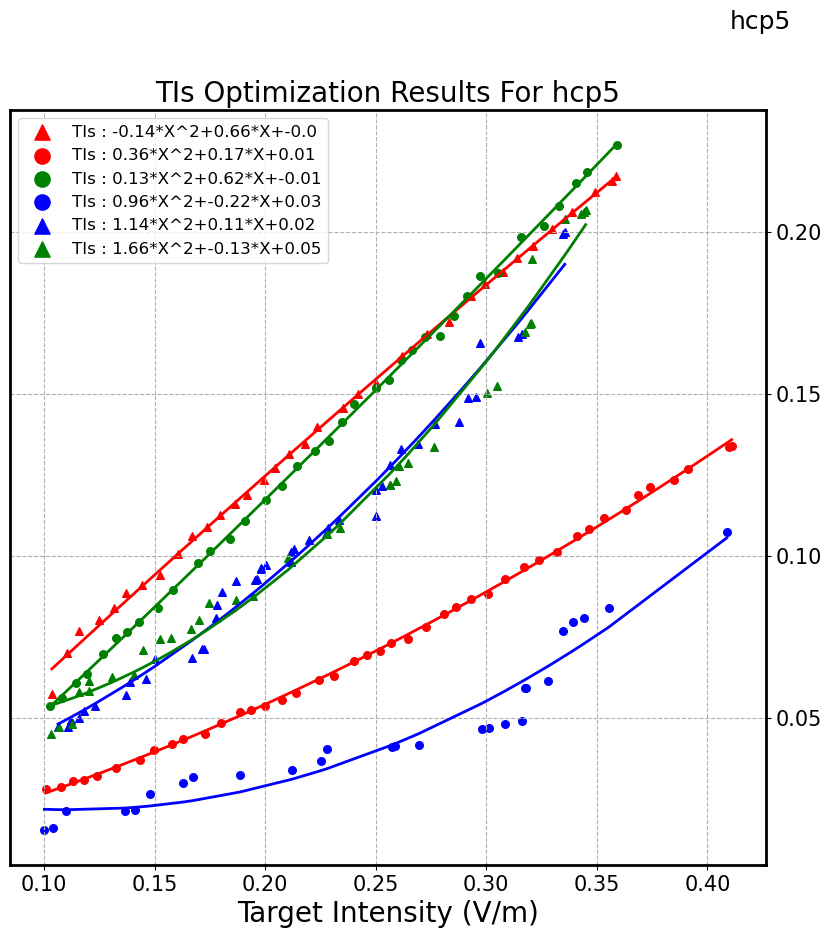

In [ ]:
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp5'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_pallidum_hcp5.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='g', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='g',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_pallidum_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='g', marker='^', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='g',linewidth = 2)

plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
# plt.xlim(0.09, 0.61, 0.08)
# plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)


# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


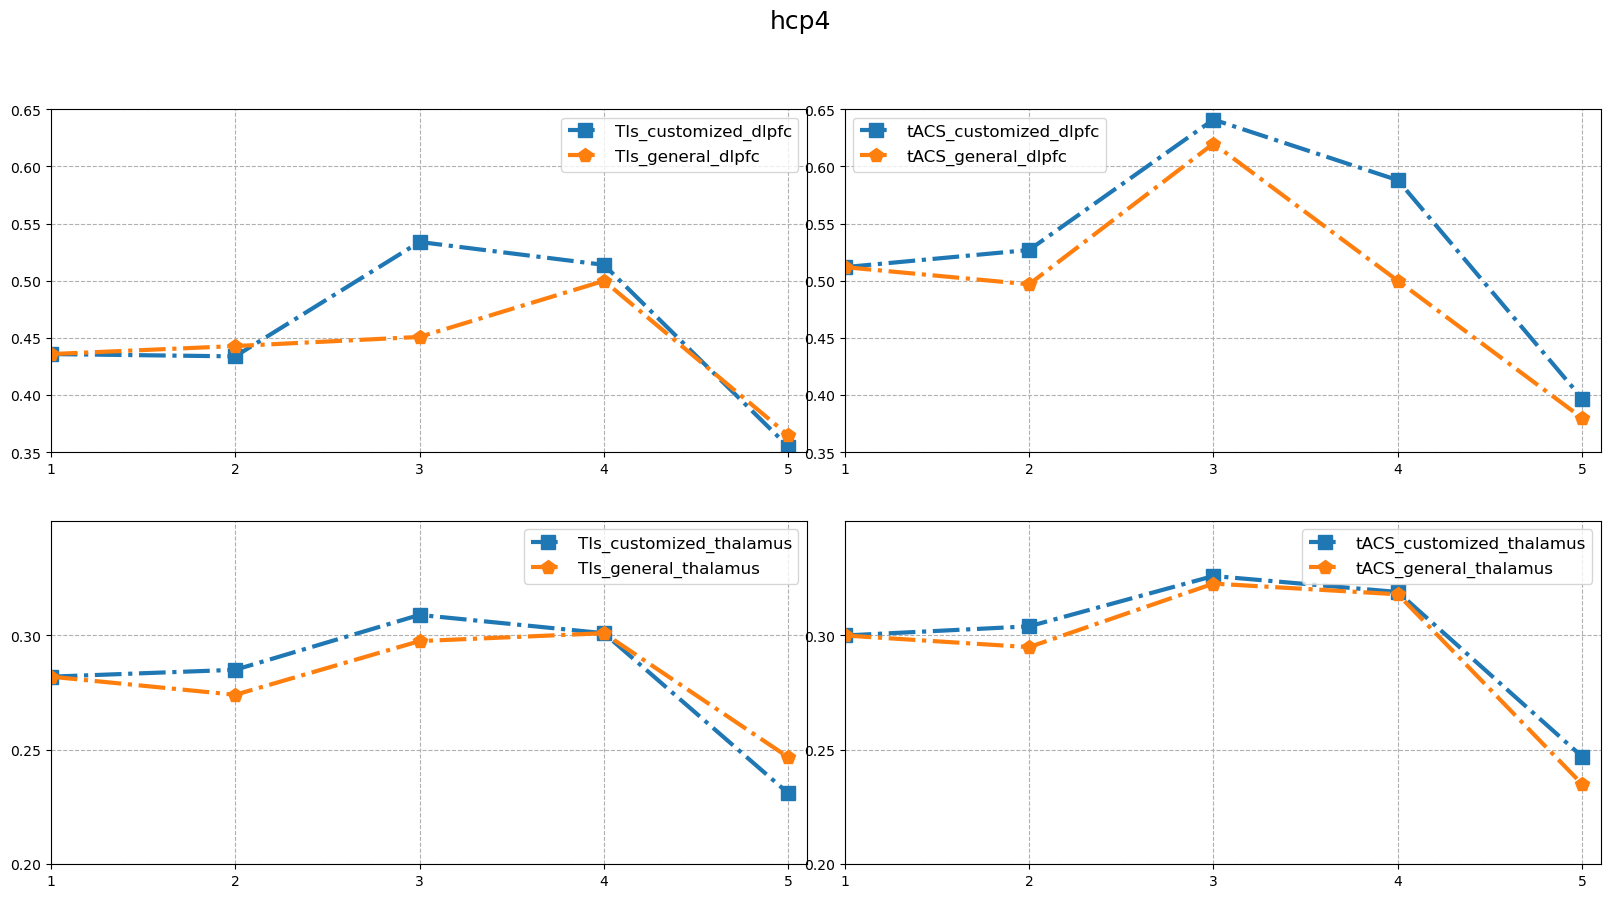

In [ ]:
from cProfile import label
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use(['ggplot'])
GAP =0.01
MODEL ='hcp4'
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)

plt.subplot(221)
plt.grid(True,linestyle = '--') # 不显示网格线
plt.plot([1,2,3,4,5],[0.436,0.434,0.534,0.514,0.355],'-.s',linewidth = 3,markersize = 10,label = 'TIs_customized_dlpfc')  #ti
plt.plot([1,2,3,4,5],[0.436,0.443,0.451,0.50,0.365],'-.p',linewidth = 3,markersize = 10,label = 'TIs_general_dlpfc')  #ti montage
plt.ylim(0.35, 0.65, 0.05)
plt.yticks(np.arange(0.35, 0.65, 0.05),size =10)
#plt.figure(figsize=(20, 10), dpi=100)
#t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)
#plt.plot([1,2,3,4,5],[0.436,0.434,0.534,0.514,0.355])  #ti
#plt.plot([1,2,3,4,5],[0.390,0.412,0.452,0.356,0.349])  #v1``
plt.xlim(1, 5.1, 1)
plt.xticks(np.arange(1, 5.1, 1),size =10)
plt.legend(loc='best', fontsize=12, markerscale=1)


plt.subplot(222)
plt.grid(True,linestyle = '--') # 不显示网格线
plt.plot([1,2,3,4,5],[0.512,0.527,0.641,0.588,0.397],'-.s',linewidth = 3,markersize = 10,label = 'tACS_customized_dlpfc')  #tdcs max
plt.plot([1,2,3,4,5],[0.512,0.497,0.62,0.50,0.38],'-.p',linewidth = 3,markersize = 10,label = 'tACS_general_dlpfc')  #tdcs montage
plt.ylim(0.35, 0.65, 0.05)
plt.yticks(np.arange(0.35, 0.65, 0.05),size =10)
plt.legend(loc='best', fontsize=12, markerscale=1)# ax.spines['right'].set_color('#ccc')
plt.xlim(1, 5.1, 1)
plt.xticks(np.arange(1, 5.1, 1),size =10)
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')
plt.subplot(223)
plt.grid(True,linestyle = '--') # 不显示网格线
plt.plot([1,2,3,4,5],[0.282,0.285,0.309,0.301,0.231],'-.s',linewidth = 3,markersize = 10,label = 'TIs_customized_thalamus')  #ti max
plt.plot([1,2,3,4,5],[0.282,0.27408192395138004 ,0.29755473664074955,0.301,0.2467420973246199],'-.p',linewidth = 3,markersize = 10,label = 'TIs_general_thalamus')  #ti ge
plt.ylim(0.2, 0.35, 0.05)
plt.yticks(np.arange(0.2, 0.35, 0.05),size =10)
plt.xlim(1, 5.1, 1)
plt.xticks(np.arange(1, 5.1, 1),size =10)
plt.legend(loc='best', fontsize=12, markerscale=1)


plt.subplot(224)
plt.grid(True,linestyle = '--') # 不显示网格线
plt.plot([1,2,3,4,5],[0.300,0.304,0.326,0.319,0.247],'-.s',linewidth = 3,markersize = 10,label = 'tACS_customized_thalamus')  #tdcs montag
plt.plot([1,2,3,4,5],[0.300,0.29491458623758476  ,0.32267878956827123,0.318,0.23494747156629053],'-.p',linewidth = 3,markersize = 10,label = 'tACS_general_thalamus')  #tdcs ge
plt.xlim(1, 5.1, 1)
plt.xticks(np.arange(1, 5.1, 1),size =10)
plt.legend(loc='best', fontsize=12, markerscale=1)
plt.ylim(0.2, 0.35, 0.05)
plt.yticks(np.arange(0.2, 0.35, 0.05),size =10)

plt.xlim(1, 5.1, 1)
plt.xticks(np.arange(1, 5.1, 1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)
t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.legend(loc='best', fontsize=12, markerscale=1)
plt.show()


In [ ]:
import numpy as np
lfm = np.load(r'/media/ncclab306/database7/wangm/simnibs_leadfield/lfm_hcp4_2.npy')
pos = np.load(r'/media/ncclab306/database7/wangm/simnibs_leadfield/pos_hcp4_2.npy')
position = [10,-19,6] #[47, -13, 52] #[-29,-19,-15] #[-29,-19,-15]#LEFT-HIPPO #[25,3,-1] paliidum #[41,-36,66] sensory #[25,42,37]dorsal # v1 [11,-94,0]   # MNI_coords #r_dkpfc [52, 38, 15] #motor [44, -18, 57]
distance = np.zeros(len(pos))

# for i in range(len(pos)):
#     print(pos[i, 0])
#     print(pos[i, 1])
#     print(pos[i, 2])
#     print(i)
for i in range(len(pos)):
    distance[i] = (pos[i, 0] - position[0])**2 + (pos[i, 1] - position[1])**2 + (pos[i, 2] - position[2])**2

# index = np.argmin(distance)
# TARGET_POSITION = index
TARGET_POSITION = np.where(distance < 10**2)
TARGET_POSITION = TARGET_POSITION[0]
print(len(TARGET_POSITION))

4746


In [ ]:
max = 0
for x in range(5):
    for y in range(5):
        for z in range(5):
            for w in range(5):
                for t in [1,10,20,7,5,4,3,2]:
                    if tis_constraint6([x,y,z,w,t]):
                        temp = tis_function6(x,y,z,w,t) 
                        if temp > max:
                            max = temp
                            layout = [x,y,z,w,t]
print(max)
print(layout)
                        

0.0


/tmp/ipykernel_52451/406858812.py:28: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)


0.036060005689446936
0.038063339338860656
0.03434286256137803
0.0320533383906195
0.030050004741205782
0.02671111532551626
0.02003333649413719
0.0
0.08355094501214352
0.08819266417948483
0.07957232858299385
0.07426750667746092
0.06962578751011961
0.0618895888978841
0.04641719167341307
0.0
0.0005770168117138041
0.0006090733012534599
0.0005495398206798115
0.0005129038326344926
0.0004808473430948368
0.0004274198605287438
0.00032056489539655786
0.0
0.052214686939555575
0.055115502880642
0.049728273275767225
0.04641305505738273
0.043512239116296314
0.038677545881152284
0.02900815941086421
0.0
0.005249275032645074
0.0055409014233475775
0.0049993095549000655
0.004666022251240065
0.004374395860537561
0.003888351876033383
0.0029162639070250407
0.0
0.004672258220931269
0.004931828122094117
0.004449769734220254
0.004153118418605573
0.0038935485174427242
0.003460932015504639
0.002595699011628483
0.0
0.051579770262677016
0.05444531305504796
0.04912359072635907
0.045848684677935125
0.0429831418855641

In [ ]:
layout = []
for x in range(5):
    for y in range(5):
        for z in range(5):
            for w in range(5):
                for t in [1,10,20,7,5,4,3,2]:
                    if tis_constraint6([x,y,z,w,t]):
                            layout.append([x,y,z,w,t])
print(len(layout))


                        

960


In [ ]:
import multiprocessing

def fun_(x):
    v = tis_function6(x[0],x[1],x[2],x[3],x[4])
    return([v,x])
p = multiprocessing.Pool(100)
output = np.array(p.map(fun_, np.array(layout)))
p.close()
p.join()

print(output)

/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipykernel_52451/1194038990.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cos_ = point/(l_x*l_y)
/tmp/ipy

[[0.0 array([0, 1, 2, 3, 1])]
 [0.03489473969713128 array([ 0,  1,  2,  3, 10])]
 [0.03522966776258423 array([ 0,  1,  2,  3, 20])]
 ...
 [0.06272669657783954 array([4, 3, 2, 1, 4])]
 [0.0658379378635298 array([4, 3, 2, 1, 3])]
 [0.057488098720158476 array([4, 3, 2, 1, 2])]]


In [ ]:
np.argmax(output[:,0])
output[51]

array([0.07855119549634125, array([0, 2, 1, 3, 7])], dtype=object)

In [ ]:
import math
def tis_constraint6(x):
    lst = [math.ceil(x[i] * NUM_ELE) for i in [2, 3, 1, 0]]
    set_lst = set(lst)
    if len(set_lst) == len(lst):
        return True
    else:
        return False

In [ ]:

def tdcs_function1(x):
    x = np.array(x)
    return np.average(((np.matmul(lfm[:, TARGET_POSITION, 0].T, x)) ** 2 + (
        np.matmul(lfm[:, TARGET_POSITION, 1].T, x)) ** 2 + (np.matmul(lfm[:, TARGET_POSITION, 2].T, x)) ** 2) ** 0.5)/1000


In [ ]:
x = np.zeros(75)
x[73] = 1
x[72] = 1
x[14] = -1
x[5] = -1 
print(tdcs_function1(x))
print(tis_function6(0,72,4,70,74))

0.27240459493634356
0.24713003581540166


In [ ]:
x = np.zeros(75)
x[73] = 1
x[72] = 1
x[14] = -1
x[5] = -1 
print(tdcs_function1(x))
print(tis_function6(72,14,73,5,74))

0.27240459493634356
0.25449837732779573


In [ ]:
NUM_ELE = 75
def tis_function6(x1, x2, x3, x4,x5):
    eam = np.zeros(len(TARGET_POSITION))
    electrode1 = x1
    electrode2 = x2
    stimulation1 = np.zeros(NUM_ELE)
    stimulation1[electrode1] = 1 + 1/x5
    stimulation1[electrode2] = -1 - 1/x5
    e1 = np.array([np.matmul(lfm[:, TARGET_POSITION, 0].T, stimulation1), np.matmul(lfm[:, TARGET_POSITION, 1].T, stimulation1),np.matmul(lfm[:, TARGET_POSITION, 2].T, stimulation1)]).T /1000
    #print(np.max(e1))
    electrode3 = x3
    electrode4 = x4
    stimulation2 = np.zeros(NUM_ELE)
    # stimulation2[electrode3] = 1.5 - x[0]
    # stimulation2[electrode4] = -1.5 + x[0]
    stimulation2[electrode3] = 1 - 1/x5
    stimulation2[electrode4] = -1 + 1/x5
    e2 = np.array([np.matmul(lfm[:, TARGET_POSITION, 0].T, stimulation2), np.matmul(lfm[:, TARGET_POSITION, 1].T, stimulation2),np.matmul(lfm[:, TARGET_POSITION, 2].T, stimulation2)]).T / 1000
    t1 = e1 + e2
    t2 = e1 - e2
    for i in range(len(t1)):
        eam[i] = np.sqrt(t1[i].dot(t1[i])) - np.sqrt(t2[i].dot(t2[i]))
    # for i in range(len(e1)):
    #     l_x = np.sqrt(e1[i].dot(e1[i]))
    #     l_y = np.sqrt(e2[i].dot(e2[i]))
    #     point = e1[i].dot(e2[i])
    #     cos_ = point/(l_x*l_y)
    #     #print(cos_)
    #     if cos_ <= 0:   # one of the fields must be flipped when a > 90 degrees
    #         e1[i] = -e1[i]
    #         cos_ = -cos_
    #     if l_y < l_x:
    #         if l_y < l_x * cos_:
    #             eam[i] = 2 * l_y
    #         else:
    #             eam[i] = 2 * np.linalg.norm(np.cross(e2[i], (e1[i] - e2[i]))) / np.linalg.norm(e1[i] - e2[i])
    #     else:
    #         if l_x < l_y * cos_:
    #             eam[i] = 2 * l_x
    #         else:
    #             eam[i] = 2 * np.linalg.norm(np.cross(e1[i], (e2[i] - e1[i]))) / np.linalg.norm(e2[i] - e1[i])
    # #print(eam)
    return np.mean(eam) # ,eam[TARGET_AVOID] ,dis


0.23494747156629053

In [ ]:
#thalamus tdcs 0.246 0.402 0.312 0.289 0.326 0.254 0.237 0.283
#ti 0.274 0.377 0.300 0.275 0.306 0.2294 0.216 0.270

In [ ]:
#conventional tdcs    0.2749171646507057     0.3857947951228758 0.30086206097972734 
0.28588961338789415 0.3233498073499836 0.23927386617459653 0.22571934262545423 0.27240459493634356
#ti      0.2705753923007696    0.3660419467512318 0.30275776027550605 0.27692728039183334 
0.31566653332761285 0.21249866289832442 0.21361010313418613 0.24713003581540166  

/tmp/ipykernel_33054/4220724059.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-.s" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='o',markersize = 5,label = 'tACS_customized_thalamus')  #tdcs montagplt.xlim(1, 5.1, 1)
/tmp/ipykernel_33054/4220724059.py:69: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-.s" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='^',markersize = 5,label = 'tACS_customized_thalamus')  #tdcs montagplt.xlim(1, 5.1, 1)
/tmp/ipykernel_33054/4220724059.py:109: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-.s" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='o',mar

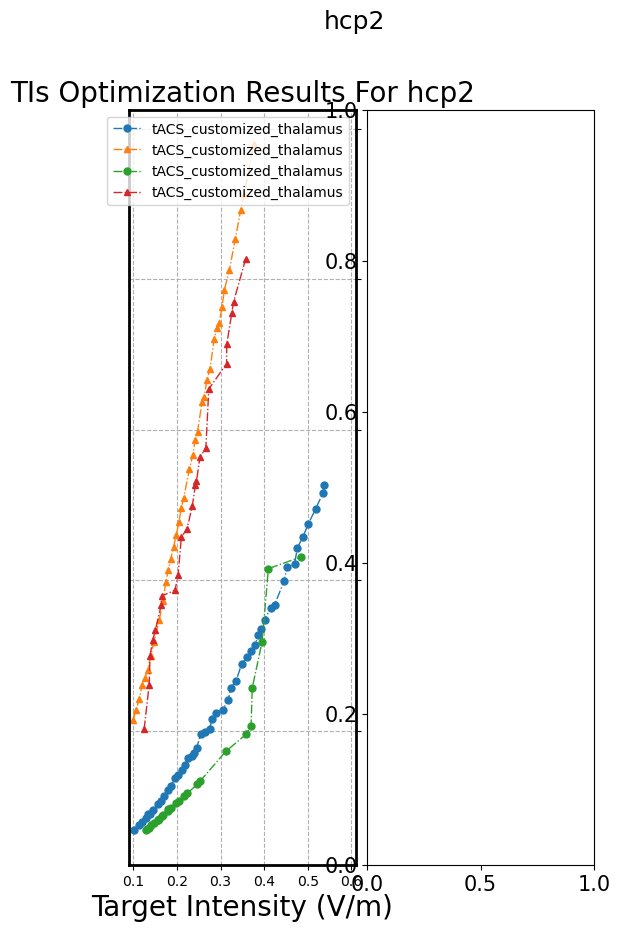

In [ ]:
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp2'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(1,2,figsize=(6, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_pallidum_hcp2.txt")

# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],GAP/2)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='o',markersize = 5,label = 'tACS_customized_thalamus')  #tdcs montagplt.xlim(1, 5.1, 1)

#plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='^',markersize = 5,label = 'tACS_customized_thalamus')  #tdcs montagplt.xlim(1, 5.1, 1)

#plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='o',markersize = 5,label = 'tACS_customized_thalamus')  #tdcs montagplt.xlim(1, 5.1, 1)

#plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.plot(1/data[index, 0], data[index, 1],'-.s',linewidth = 1, marker='^',markersize = 5,label = 'tACS_customized_thalamus')  #tdcs montagplt.xlim(1, 5.1, 1)

p = np.poly1d(parameter)
#plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


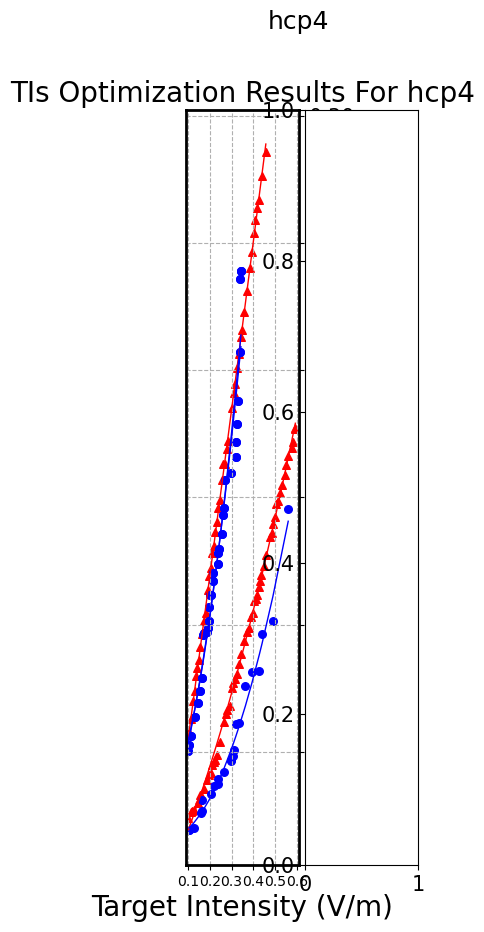

In [ ]:

#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp4'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(1,2,figsize=(3, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_pallidum_hcp2.txt")

# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]a
# index = cal_rank(1 / data[:,0],GAP/2)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_dlpfc_hcp4.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)



# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()



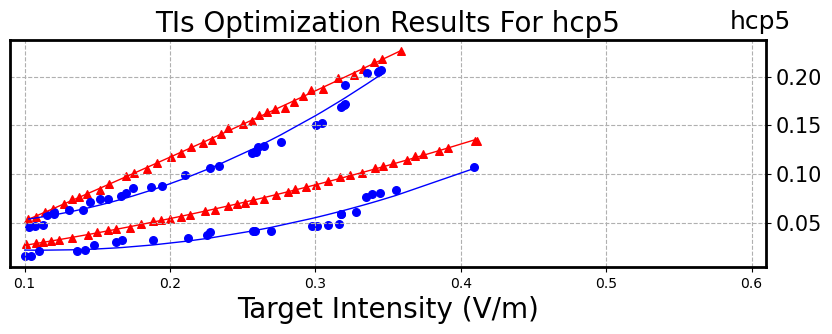

In [ ]:

#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp5'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 3), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(121)

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_pallidum_hcp2.txt")

# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]a
# index = cal_rank(1 / data[:,0],GAP/2)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 2)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")


#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

# gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 2)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
# plt.ylim(0, 0.25, 0.05)
# plt.yticks(np.arange(0.05, 0.25, 0.05),size =10)



# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()





The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


NameError: name 'cal_rank' is not defined

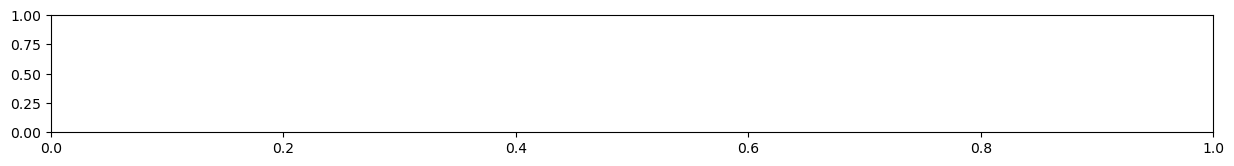

In [ ]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01


#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(1,5,figsize=(15, 9), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(511)
MODEL = 'hcp1'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)

plt.ylim(0, 0.31, 0.1)
plt.yticks(np.arange(0, 0.31, 0.1),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

MODEL = 'hcp2'
plt.subplot(512)

MODEL ='hcp2'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
plt.ylim(0, 0.31, 0.1)
plt.yticks(np.arange(0, 0.31, 0.1),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')
plt.subplot(513)
MODEL = 'hcp3'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)

plt.ylim(0, 0.31, 0.1)
plt.yticks(np.arange(0, 0.31, 0.1),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(514)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)

plt.ylim(0, 0.31, 0.1)
plt.yticks(np.arange(0, 0.31, 0.1),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(515)
MODEL = 'hcp5'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")


#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP/2)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.61, 0.08)
plt.xticks(np.arange(0.1, 0.7, 0.1),size =10)
plt.ylim(0, 0.31, 0.1)
plt.yticks(np.arange(0, 0.31, 0.1),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()


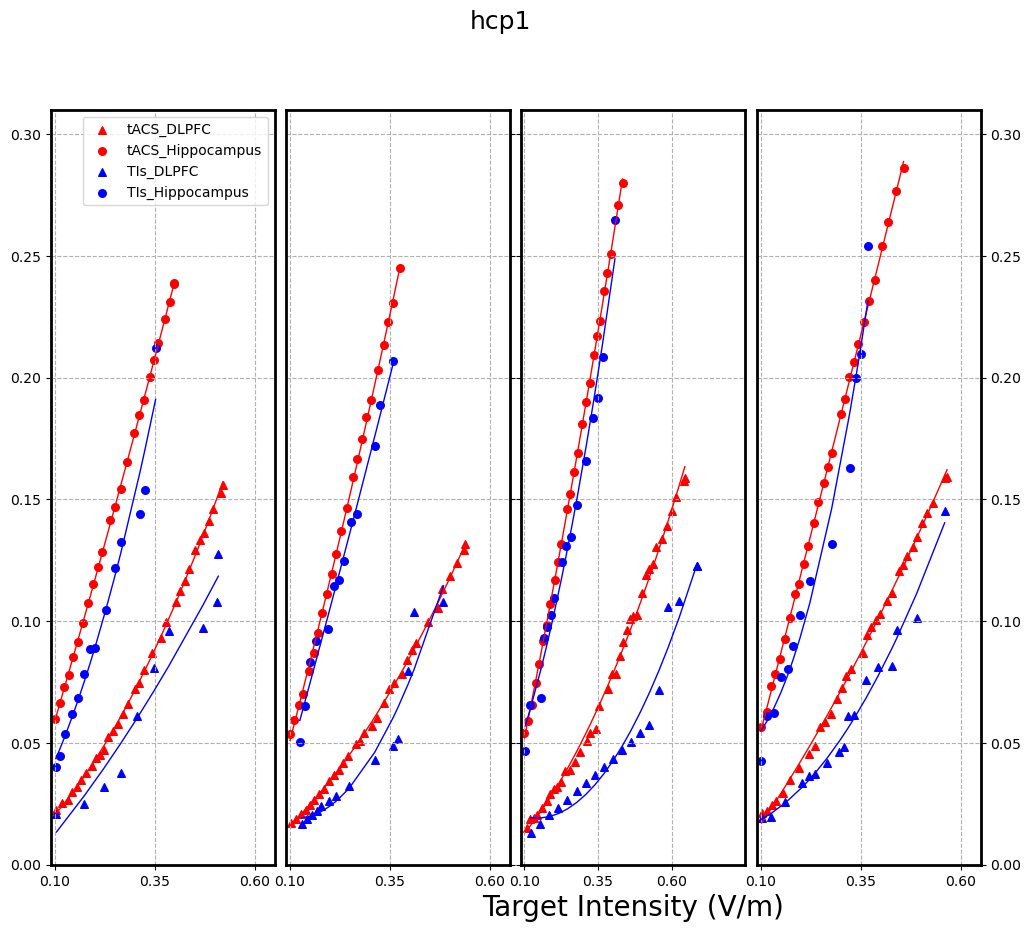

In [ ]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp2'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(4,1,figsize=(12, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(142)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(144)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(143)
MODEL = 'hcp3'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp3.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt", "r")
f2 = open(r"ObjV.csv", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])
# data = data[index]
# index = cal_rank(1 / data[:,0],0.03)
# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp3.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.85, 0.25)
plt.xticks(np.arange(0.1, 0.85, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)


plt.subplot(141)
MODEL = 'hcp1'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp1.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_dlpfc_"+MODEL+".txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.03)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp1.txt", "r")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt2/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.01)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})


plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.65, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()
#不显示y轴


FileNotFoundError: [Errno 2] No such file or directory: '/home/ncclab306/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_hcp6.txt'

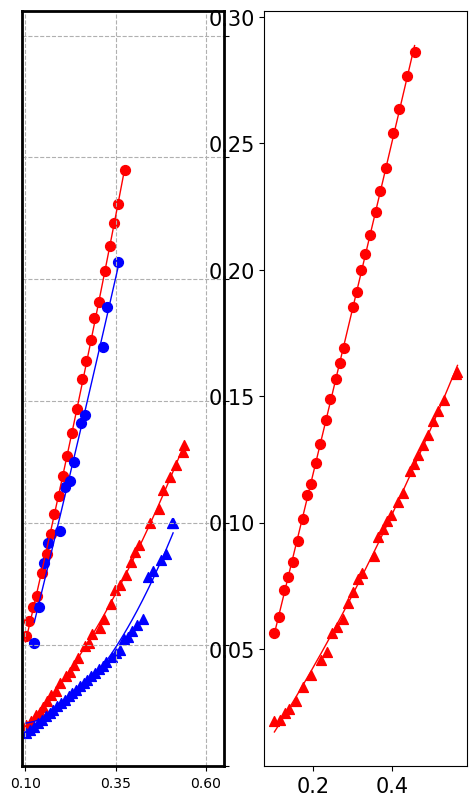

In [ ]:
#all
#avoid
import matplotlib.pyplot as plt
import numpy as np
GAP =0.01
MODEL ='hcp2'

#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(4,1,figsize=(12, 10), dpi=100)
# plt.style.use(['ggplot','grayscale'])
plt.subplot(142)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp2.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_hcp2.txt", "r")
#f2 = open(r"hcp2/hippo_ti/optPop/ObjV.csv", "r")
#f2 = open(r"hcp2/hippo_ti/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.02)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"hcp2/dlpfc_ti/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.02)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(144)
MODEL = 'hcp4'
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp4.txt")

lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt3/pareto_fitness_hippo_hcp4.txt")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_DLPFC') #: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=12, markerscale=2)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
#plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.61, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)

ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.subplot(143)
MODEL = 'hcp3'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp3.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp3.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"hcp3/dlpfc_ti/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.02)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

#plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
ax.axes.yaxis.set_ticklabels([])
plt.xlim(0.09, 0.85, 0.25)
plt.xticks(np.arange(0.1, 0.85, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)


plt.subplot(141)
MODEL = 'hcp1'
gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_dlpfc_hcp1.txt")

#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='^', label='tACS_DLPFC')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)

gt_data = []
#f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp5.txt")
f2 = open(r"/mnt/zfs-pool/tes/mopso/img_txt/pareto_fitness_hippo_hcp1.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='r', marker='o', label='tACS_Hippocampus')# : '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='r',linewidth = 1)


gt_data = []

f2 = open(r"hcp1/hippo_ti/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.02)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='o', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)


gt_data = []

f2 = open(r"hcp1/dlpfc_ti/optPop/ObjV.csv", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])
data = data[index]
index = cal_rank(1 / data[:,0],0.02)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='b', marker='^', label='TIs_Hippocampus' )#: '+ str(np.around(parameter[0],decimals=2))+'*X^2+'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='b',linewidth = 1)

plt.legend(loc='best', fontsize=10, markerscale=1)
#plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
#plt.rcParams.update({'font.size': 15})


plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')

plt.xlim(0.09, 0.65, 0.25)
plt.xticks(np.arange(0.1, 0.65, 0.25),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0, 0.31, 0.05),size =10)


# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)

plt.show()
#不显示y轴


87
147
131
108
105
101


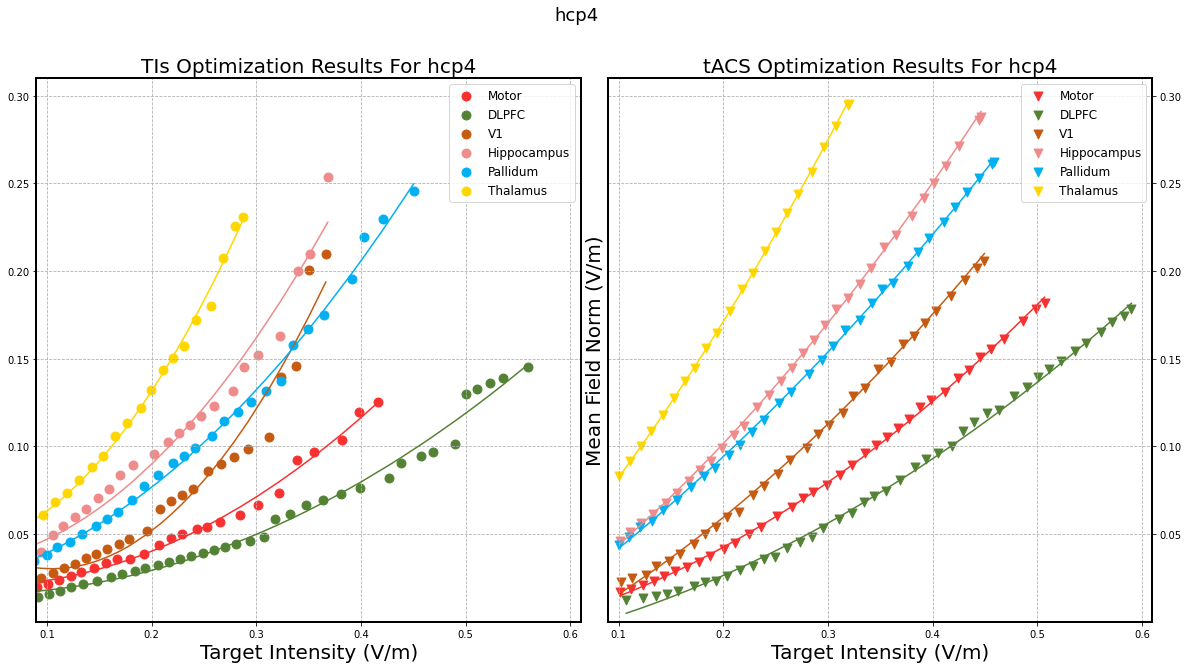

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from public import NDsort
GAP = 0.01
SIZE = 80
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index

def rank_dense(x):
    
    #print(x)
    length = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0 or i == len(x)-1:
            length[i] = 999
        else: 
            length[i] = x[i+1] - x[i-1]
    return -length
        
RES = 50
MODEL ='hcp4'
# for tacs img_txt is node == 1000,for ti img_txt/2
#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10))

plt.subplot(122)
gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_motor_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE, c='#F73030', marker='v', label='Motor' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#F73030')


gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#548235', marker='v', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#548235')


gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_v1_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#C55A11', marker='v', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#C55A11')


gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#ef8b8b', marker='v', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#ef8b8b')
#
#
gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_pallidum_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1],  c='#00b0f0', s=SIZE, marker='v', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#00b0f0')

#
#
gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE, c='gold', marker='v', label='Thalamus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='gold')

#
plt.legend(loc='upper right', fontsize=12, markerscale=1)
plt.title('tACS Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度
plt.grid(True,linestyle = '--') # 不显示网格线

ax = plt.gca()
ax.yaxis.set_ticks_position('right')
# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)


#-----------------------------------------------#
plt.subplot(121)
gt_data = []
f2 = open('temp.txt',"r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_motor_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_motor_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,3)
index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1/data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#F73030', marker='o', label='Motor' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#F73030')




gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#548235', marker='o', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#548235')


# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_v1_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_v1_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])

# data = data[index]
# index = cal_rank(1 / data[:,0],0.005)

# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='#C55A11', marker='o', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='#C55A11')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/intensity_pareto_fitness_v1_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_v1_hcp4.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#C55A11', marker='o', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#C55A11')


#
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#ef8b8b', marker='o', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#ef8b8b')

#

gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_pallidum_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_pallidum_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#00b0f0', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')



#
gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)

data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='gold', marker='o', label='Thalamus' ) #: '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='gold')


plt.legend(loc='upper right', fontsize=12, markerscale=1)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
#
plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)

# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)
# t.savefig(MODEL+'_mopso_r2.png')

plt.show()

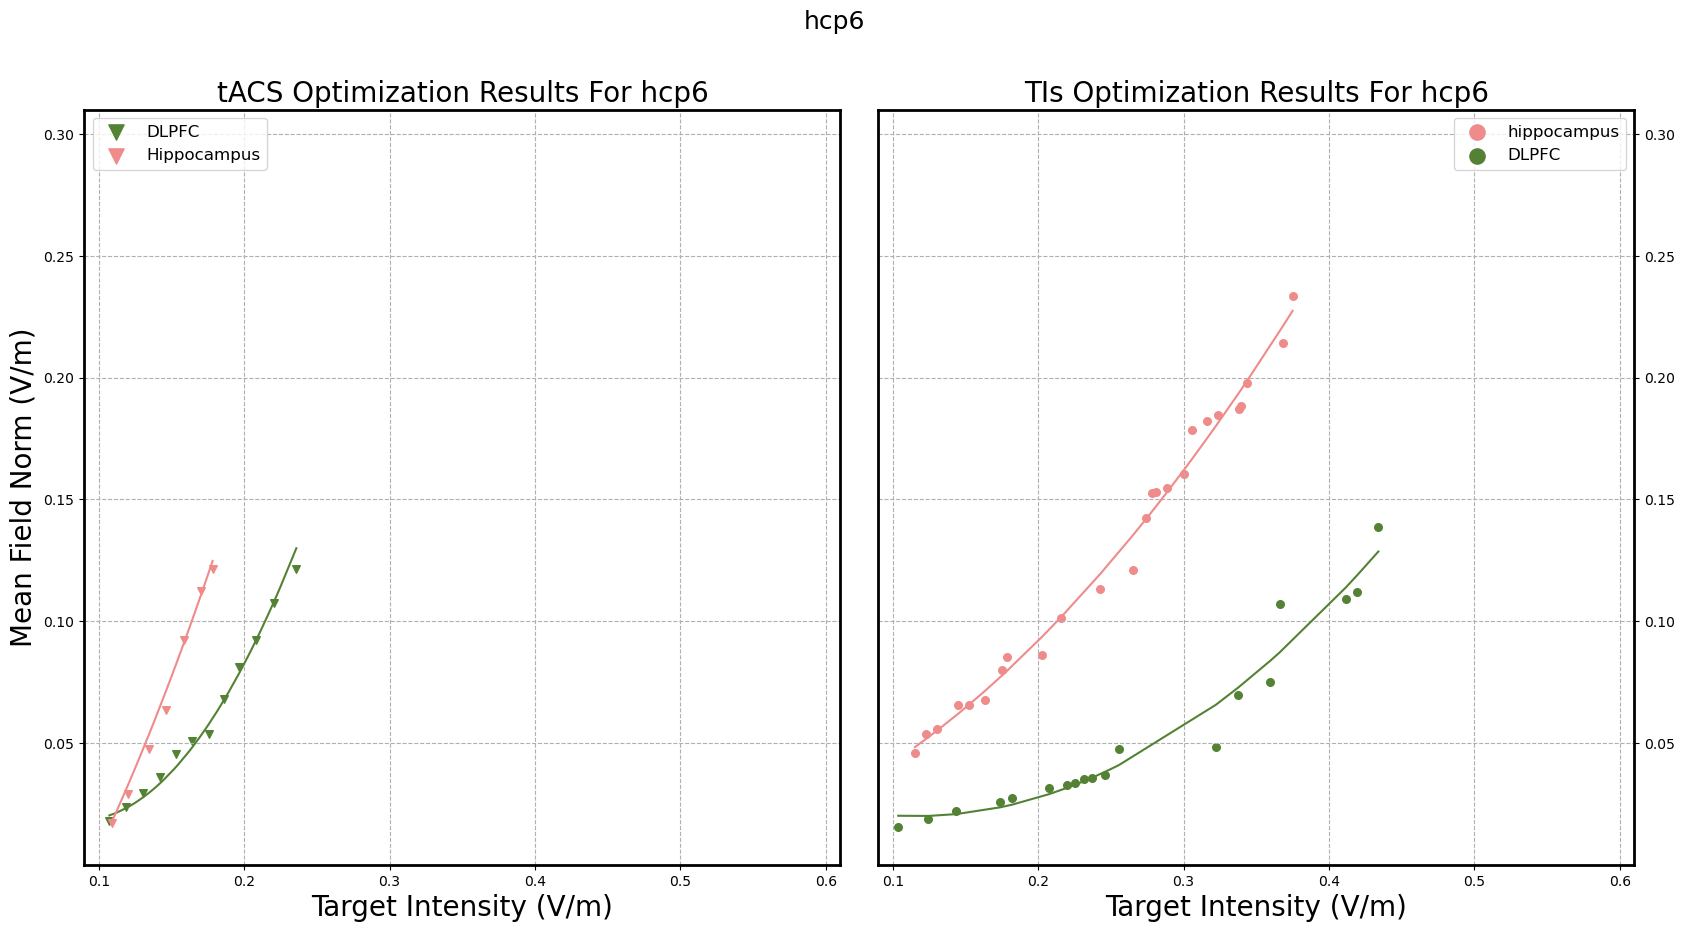

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

GAP = 0.01
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index

def rank_dense(x):
    
    #print(x)
    length = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0 or i == len(x)-1:
            length[i] = 999
        else: 
            length[i] = x[i+1] - x[i-1]
    return -length
        
RES = 50
MODEL ='hcp6'
# for tacs img_txt is node == 1000,for ti img_txt/2
#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10), dpi=100)
plt.subplot(121)
gt_data = []
f2 = open(r"img_txt/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=30,  c='#548235', marker='v', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#548235')

#
gt_data = []
f2 = open(r"img_txt/pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=30,  c='#ef8b8b', marker='v', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#ef8b8b')

#
plt.legend(loc='upper left', fontsize=12, markerscale=2)
plt.title('tACS Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度
plt.grid(True,linestyle = '--') # 不显示网格线

ax = plt.gca()

# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)


#-----------------------------------------------#
plt.subplot(122)
gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1/data[:,0],0.001)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='#ef8b8b', marker='o', label='hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#ef8b8b')

gt_data = []    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.005)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='#548235', marker='o', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#548235')

plt.legend(loc='best', fontsize=12, markerscale=2)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
#
plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)

# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)
# t.savefig(MODEL+'_mopso_r2.png')

plt.show()

In [3]:
from this import d
import numpy as np
d_tacs = np.zeros([6,35])
d_ti = np.zeros([6,35])
for i in range(6):
    gt_data = []
    f2 = open(r'/mnt/database7/wangm/eeg10/tacs_1017_'+str(i+1)+'.txt')
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
    lines = f2.readlines()
    for line3 in lines:
        #print(line3)
        cur = line3.strip().split(" ")
        cur = list(map(float, cur))
        gt_data.append(cur)
    data = np.array(gt_data)
    d_tacs[i] = data.reshape(1,-1)[0]

    gt_data = []
    f2 = open(r'/mnt/database7/wangm/eeg10/ti_1017_1'+str(i+1)+'.txt')
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
    lines = f2.readlines()
    for line3 in lines:
        print(line3)
        cur = line3.strip().split(" ")
        line3 = list(map(float, cur))
        gt_data.append(line3)
    data = np.array(gt_data)
    d_ti[i] =data.reshape(1,-1)[0]


3.288657387453522429e-01

3.781842894455242909e-01

3.211024853133460644e-01

3.293210527790248476e-01

3.064830926292133606e-01

3.855722326291679547e-01

4.074638293776617903e-01

3.882543370163741292e-01

4.530678332379287632e-01

3.164498908177577063e-01

2.696483707741040847e-01

3.885748722792140009e-01

3.224769865519251932e-01

4.233149441310055661e-01

5.242474523505170625e-01

4.883094588293802052e-01

3.003333309935673490e-01

3.477235422833107603e-01

3.762011955344138348e-01

3.009656813273557940e-01

2.984239396838078151e-01

3.158080181926002372e-01

4.049956707028508629e-01

3.828051087331471036e-01

3.770668392022502036e-01

3.848672791883939182e-01

3.777523642705828966e-01

3.584643799660907626e-01

3.596646516601733068e-01

3.975829940647663818e-01

4.228729245460596253e-01

4.320405297992696569e-01

5.022972295115124552e-01

3.706014882149363254e-01

2.952056427312777509e-01

3.790550151049829619e-01

3.635369441665108337e-01

3.444652622527141772e-01

3.5574435616

In [6]:
d_tacs.shape

(6, 35)

[ 8 14 32 15 30 31  6 13  7 27 11 29  5 24 26 33  1  0 28 22 12 18 25  3
 23  9  4 17  2 21 19 16 20 34 10]


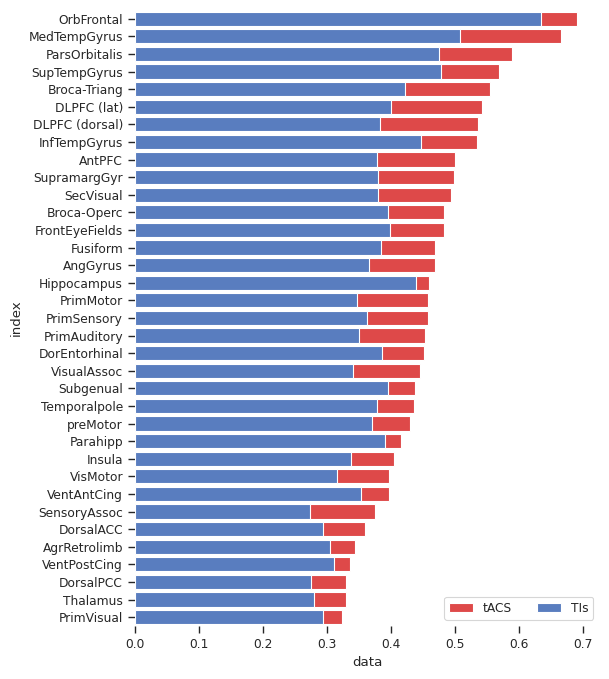

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context('paper')
name_list = ['PrimSensory','PrimMotor','SensoryAssoc','preMotor','VisMotor','FrontEyeFields','DLPFC (dorsal)','AntPFC','OrbFrontal',
             'Insula','PrimVisual','SecVisual','VisualAssoc','InfTempGyrus','MedTempGyrus','SupTempGyrus',
             'VentPostCing','VentAntCing','Subgenual','AgrRetrolimb','DorsalPCC','DorsalACC','DorEntorhinal','Parahipp',
             'Fusiform','Temporalpole','AngGyrus','SupramargGyr','PrimAuditory','Broca-Operc',
             'Broca-Triang','DLPFC (lat)','ParsOrbitalis','Hippocampus','Thalamus']
# df = pd.DataFrame(data = [0.45,0.45,0.37,0.434, 0.4,0.486,0.534,0.504,0.692,0.404,0.32,0.494,0.446,0.545,0.664,
#                                     0.576,0.338,0.390,0.439,0.348,0.33,0.365,0.456,0.417,0.470,0.437,0.472,
#                                     0.496,0.447,0.489,0.554,0.5511,0.589,0.46,0.33],columns=['data'])

# index = np.argsort(-np.array([0.45,0.45,0.37,0.434, 0.4,0.486,0.534,0.504,0.692,0.404,0.32,0.494,0.446,0.545,0.664,
#                                      0.576,0.338,0.390,0.439,0.348,0.33,0.365,0.456,0.417,0.470,0.437,0.472,
#                                      0.496,0.447,0.489,0.554,0.5511,0.589,0.46,0.33]))
# print(index)
# dic1 = {'data':np.array([0.45,0.45,0.37,0.434, 0.4,0.486,0.534,0.504,0.692,0.404,0.32,0.494,0.446,0.545,0.664,
#                                      0.576,0.338,0.390,0.439,0.348,0.33,0.365,0.456,0.417,0.470,0.437,0.472,
#                                      0.496,0.447,0.489,0.554,0.5511,0.589,0.46,0.33])[index],
#        'index':np.array(name_list)[index]
#  }
# df1 = pd.DataFrame(dic1)

# dic2 = {'data':np.array([0.39,0.37,0.334,0.322,0.346,0.46,0.41,0.48,0.6232,0.334,0.267,0.394,0.348,0.41,0.53,0.466,0.273,0.348,0.358,
#  0.2759,0.303,0.305,0.422,0.376,0.3809,0.3699,0.380,0.4295,0.4067,0.3688,0.406,0.429,0.507,0.44,0.28])[index],
#        'index':np.array(name_list)[index]
#  }
# df2 = pd.DataFrame(dic2)

index = np.argsort(-np.array([0.4589,0.459197,0.3759,0.430977,0.39772,0.48278,0.536019,0.49989,0.691961,0.404746,0.3244781,0.49371,0.4461,0.53517,0.666644
,0.568727,0.3366,0.39734,0.43869,0.3451,0.3307,0.36066,0.452007,0.4169,0.47008,0.437246,0.4697,0.499809,0.45431,0.48403,0.5545803,
0.5429,0.589020,0.46,0.33]))
print(index)
dic1 = {'data':np.array([0.4589,0.459197,0.3759,0.430977,0.39772,0.48278,0.536019,0.49989,0.691961,0.404746,0.3244781,0.49371,0.4461,0.53517,0.666644
,0.568727,0.3366,0.39734,0.43869,0.3451,0.3307,0.36066,0.452007,0.4169,0.47008,0.437246,0.4697,0.499809,0.45431,0.48403,0.5545803,
0.5429,0.589020,0.46,0.33])[index],
       'index':np.array(name_list)[index]
 }
df1 = pd.DataFrame(dic1)

dic2 = {'data':np.array([0.362369,0.34723,0.274601,0.37080,0.31581,0.398605,0.38388,0.378180,0.634600,0.338349,0.294758,0.38054,0.34123,0.44734,
0.5090833,0.479461,0.3118961,0.353847,0.395745,0.30575,0.27580,0.294810,0.38725,0.391929,0.38427,0.37814006,0.3666,0.3806973,0.351097
,0.39544345,0.42181,0.40044,0.4758917,0.44,0.28])[index],
       'index':np.array(name_list)[index]
 }
df2 = pd.DataFrame(dic2)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

f, ax = plt.subplots(figsize = (6,8))
sns.set_color_codes('pastel')
sns.barplot(x = 'data', y = 'index', data = df1,
            label = 'tACS', color = '#F73030', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'data', y = 'index', data = df2,
            label = 'TIs', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()


In [1]:
#from this import d
import numpy as np
gt_data = []
f2 = open(r"/mnt/database7/wangm/eeg10/tacs_1017_6.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
d_tacs6 = data.reshape(1,-1)[0]

gt_data = []
f2 = open(r"/mnt/database7/wangm/eeg10/ti_1017_8.txt")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    line3 = list(map(float, cur))
    gt_data.append(line3)
data = np.array(gt_data)
d_ti = data
d_ti8=d_ti.reshape(1,-1)[0]

In [27]:
d_ti4.shape

(40,)

In [28]:
all_ti = np.vstack([d_ti,d_ti2,d_ti3,d_ti5,d_ti6])
all_tacs = np.vstack([d_tacs,d_tacs2,d_tacs3,d_tacs5,d_tacs6])

In [6]:
from operator import gt
from this import d
import numpy as np
d_tacs = np.zeros([3,35])
d_ti = np.zeros([3,35])
for i in range(3):
    gt_data = []
    f2 = open(r'/mnt/database7/wangm/eeg10/tacs_1020_'+str(i)+'.txt')
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
    lines = f2.readlines()
    for line3 in lines:
        #print(line3)
        cur = line3.strip().split(" ")
        cur = list(map(float, cur))
        gt_data.append(cur)
    
    data = np.array(gt_data)
    d_tacs[i] = data.reshape(1,-1)[0]

    gt_data = []
    f2 = open(r'/mnt/database7/wangm/eeg10/ti_1020_'+str(i)+'.txt')
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
    lines = f2.readlines()
    for line3 in lines:
        #print(line3)
        cur = line3.strip().split(" ")
        line3 = list(map(float, cur))
        gt_data.append(line3)
    # gt_data = np.array(gt_data)
    # print((data - gt_data).reshape(1,-1))
    # data = np.array(gt_data)
    data = np.array(gt_data)
    d_ti[i] =data.reshape(1,-1)[0]
print(d_tacs)


[[0.29865615 0.24742463 0.29713818 0.22732126 0.20286077 0.21594858
  0.40024733 0.35987782 0.45933889 0.26569295 0.25040703 0.32975936
  0.31418327 0.52271547 0.37285563 0.47502759 0.24331455 0.25740339
  0.35206707 0.26480823 0.21767181 0.24003839 0.42103932 0.38274991
  0.24103565 0.55555305 0.262129   0.43096747 0.24943469 0.28328223
  0.31543754 0.26719712 0.39768429 0.26754694 0.23329953]
 [0.29865615 0.24742463 0.29713818 0.22732126 0.20286077 0.21594858
  0.40024733 0.35987782 0.45933889 0.26569295 0.25040703 0.32975936
  0.31418327 0.52271547 0.37285563 0.47502759 0.24307236 0.25740339
  0.35206707 0.26480823 0.21767181 0.24003839 0.42103932 0.38274991
  0.24103565 0.55555305 0.262129   0.43096747 0.24943469 0.28328223
  0.31543754 0.26719712 0.39768429 0.26754694 0.23329953]
 [0.29865615 0.24742463 0.29713818 0.22732126 0.2022749  0.21594858
  0.40024733 0.35987782 0.45933889 0.26569295 0.25040703 0.32975936
  0.31418327 0.52271547 0.37285563 0.47502759 0.24331455 0.25740339


In [3]:
from operator import gt
from this import d
import numpy as np
d_ti = np.zeros([14,35])
for i in range(9):
    gt_data = []
    f2 = open(r'/mnt/database7/wangm/eeg10/ti_1017_'+str(7+i)+'.txt')
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
    lines = f2.readlines()
    for line3 in lines:
        #print(line3)
        cur = line3.strip().split(" ")
        line3 = list(map(float, cur))
        gt_data.append(line3)
    data = np.array(gt_data)
    d_ti[i] =data.reshape(1,-1)[0]
for i in range(5):
    gt_data = []
    f2 = open(r'/mnt/database7/wangm/eeg10/ti_1017_3'+str(i)+'.txt')
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
    #f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
    lines = f2.readlines()
    for line3 in lines:
        #print(line3)
        cur = line3.strip().split(" ")
        line3 = list(map(float, cur))
        gt_data.append(line3)
    data = np.array(gt_data)
    d_ti[i+8] =data.reshape(1,-1)[0]



The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


(5, 35)

In [4]:
dd = d_ti
print(dd.shape)
dd = np.sort(dd,axis = 0)
print(dd)
d_ti = dd[-6:]
print(d_ti.shape)

(14, 35)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.32886574 0.35206258 0.31167256 0.32932105 0.30648309 0.36973247
  0.40746383 0.35862345 0.4370747  0.31644989 0.26964837 0.3751056
  0.32247699 0.42331494 0.47132788 0.45425668 0.27577903 0.34151928
  0.35252085 0.30096568 0.27445424 0.2993958  0.3774916  0.38037999
  0.37706684 0.34032345 0.36968421 0.35846438 0.35834016 0.36551539
  0.42287292 0.36336697 0.49760584 0.37060149 0.29220227]
 [0.34712208 0.35268905 0.31764672 0.3340107  0.32253742 0.37919217
  0.41673471 0.38825434 0.44868431 0.31900733 0.274054   0.38275365
  0.34102418 0.42608471 0.49765715 0.46290768 0.28115477 0.34473256
  0.36196587 0.30413094 0.276065

In [2]:

gt_data = []
f2 = open(r'/mnt/database7/wangm/eeg10/ti_1017_40.txt')
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_thalamus_"+MODEL+".txt", "r")
#f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/avoid_pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    line3 = list(map(float, cur))
    gt_data.append(line3)
data = np.array(gt_data)
d_ti_n =data.reshape(1,-1)[0]

[[0.29865615 0.24742463 0.29713818 0.22732126 0.20286077 0.21594858
  0.40024733 0.35987782 0.45933889 0.26569295 0.25040703 0.32975936
  0.31418327 0.52271547 0.37285563 0.47502759 0.24331455 0.25740339
  0.35206707 0.26480823 0.21767181 0.24003839 0.42103932 0.38274991
  0.24103565 0.55555305 0.262129   0.43096747 0.24943469 0.28328223
  0.31543754 0.26719712 0.39768429 0.26754694 0.23329953]
 [0.29865615 0.24742463 0.29713818 0.22732126 0.20286077 0.21594858
  0.40024733 0.35987782 0.45933889 0.26569295 0.25040703 0.32975936
  0.31418327 0.52271547 0.37285563 0.47502759 0.24307236 0.25740339
  0.35206707 0.26480823 0.21767181 0.24003839 0.42103932 0.38274991
  0.24103565 0.55555305 0.262129   0.43096747 0.24943469 0.28328223
  0.31543754 0.26719712 0.39768429 0.26754694 0.23329953]
 [0.29865615 0.24742463 0.29713818 0.22732126 0.2022749  0.21594858
  0.40024733 0.35987782 0.45933889 0.26569295 0.25040703 0.32975936
  0.31418327 0.52271547 0.37285563 0.47502759 0.24331455 0.25740339


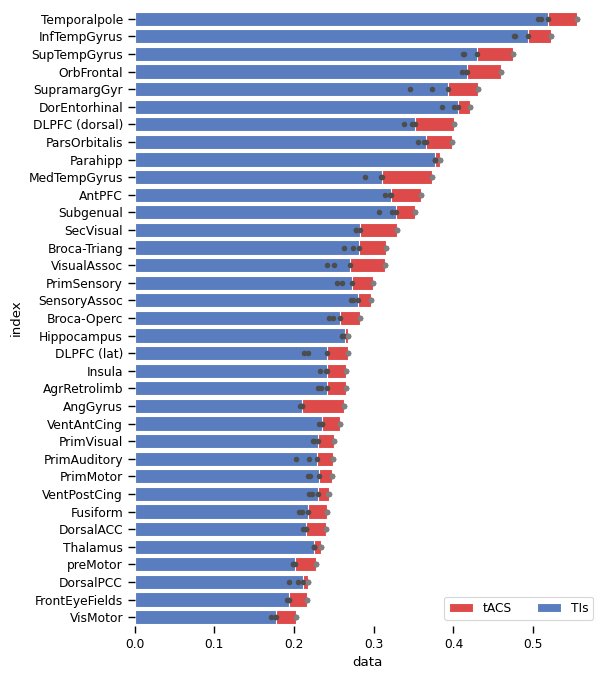

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context('paper')
name_list = ['PrimSensory','PrimMotor','SensoryAssoc','preMotor','VisMotor','FrontEyeFields','DLPFC (dorsal)','AntPFC','OrbFrontal',
             'Insula','PrimVisual','SecVisual','VisualAssoc','InfTempGyrus','MedTempGyrus','SupTempGyrus',
             'VentPostCing','VentAntCing','Subgenual','AgrRetrolimb','DorsalPCC','DorsalACC','DorEntorhinal','Parahipp',
             'Fusiform','Temporalpole','AngGyrus','SupramargGyr','PrimAuditory','Broca-Operc',
             'Broca-Triang','DLPFC (lat)','ParsOrbitalis','Hippocampus','Thalamus']

print(d_tacs)
index = np.argsort(-np.max(d_tacs,axis=0))

print(index)
dic1 = {'data':np.max(d_tacs,axis=0)[index],
       'index':np.array(name_list)[index]
 }
df1 = pd.DataFrame(dic1)

dic2 = {'data':np.max(d_ti,axis=0)[index],
       'index':np.array(name_list)[index]
 }
df2 = pd.DataFrame(dic2)


# print(index)
# dic1a = {'data':d_tacs[0,index],
#        'index':np.array(name_list)[index]
#  }
# print(all_tacs[:,index])
# df10 = pd.DataFrame(dic1a)

# dic2a = {'data':all_ti[0,index],
#        'index':np.array(name_list)[index]
#  }
# df20= pd.DataFrame(dic2a)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

f, ax = plt.subplots(figsize = (6,8))
sns.set_color_codes('pastel')
sns.barplot(x = 'data', y = 'index', data = df1,
            label = 'tACS', color = '#F73030', edgecolor = 'w')
# sns.stripplot(x="data", y="index", data=df10,
#    size=4, color=".3", linewidth=0)
    

sns.set_color_codes('muted')
sns.barplot(x = 'data', y = 'index', data = df2,
            label = 'TIs', color = 'b', edgecolor = 'w')
# sns.stripplot(x="data", y="index", data=df20,
#        size=4, color=".3", linewidth=0)



for i in range(3):
    dic1a = {'data':d_tacs[i,index],
       'index':np.array(name_list)[index]
    }
    df10 = pd.DataFrame(dic1a)

    dic2a = {'data':d_ti[i,index],
        'index':np.array(name_list)[index]
    }
    df20= pd.DataFrame(dic2a)

    sns.stripplot(x="data", y="index", data=df10,
        size=4, color=".5", linewidth=0)
    sns.stripplot(x="data", y="index", data=df20,
       size=4, color=".3", linewidth=0)

# dicn = {'data':d_ti_n[index],
#        'index':np.array(name_list)[index]
#  }
# df2n = pd.DataFrame(dicn)
# sns.stripplot(x="data", y="index", data=df2n,
#      size=4, color=".3", linewidth=0)



ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()


               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


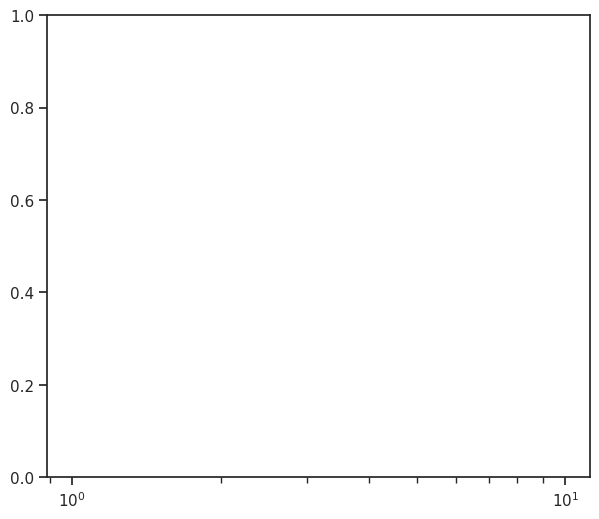

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")
print(planets)
# # Plot the orbital period with horizontal boxes
# sns.boxplot(x="distance", y="method", data=planets,
#             whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
# sns.stripplot(x="distance", y="method", data=planets,
#               size=4, color=".3", linewidth=0)

# # Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   
26   21.4     8.346    9.416          17.976       18.190       816.21   
18   20.5     7.175    6.765          14.965       20.090      1281.55   
36   19.9     6.368    5.771          18.308       18.706       881.51   
42   19.5     4.095    5.655          15.990       15.795       767.91   
43   19.4     7.760    7.372          17.654       16.878      1004.75   
41   19.4     6.014    6.402          19.012       16.684       669.31   
0    18.8     7.332    5.640          18.048       15.040       784.55   
2    18.6     6.510    5.208          

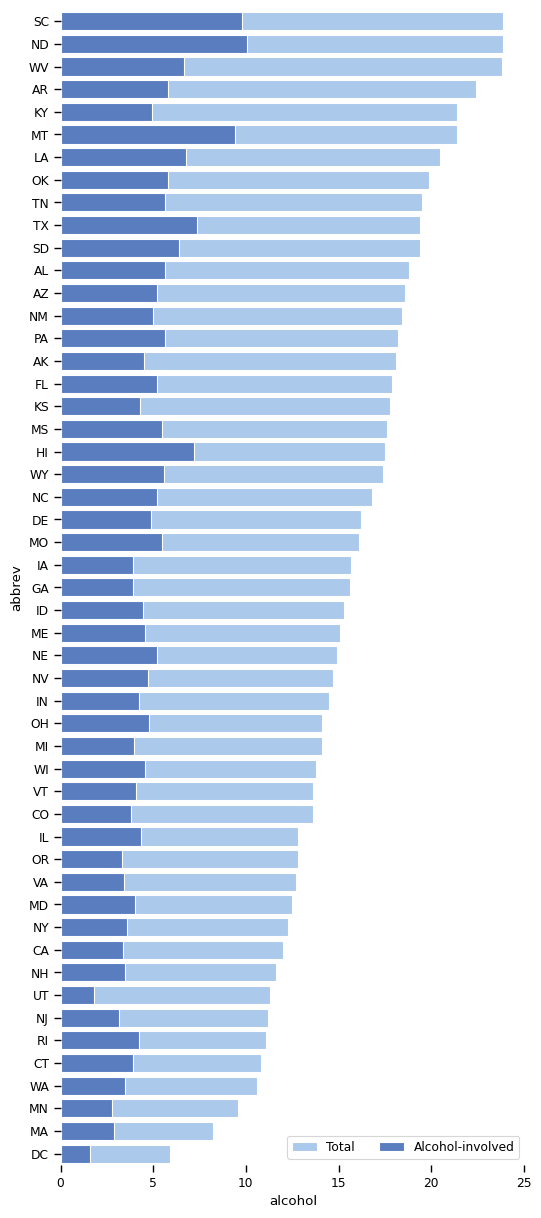

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

crashes = sns.load_dataset('car_crashes').sort_values('total', ascending = False)
print(crashes)
f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes('pastel')
sns.barplot(x = 'total', y = 'abbrev', data = crashes,
            label = 'Total', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'alcohol', y = 'abbrev', data = crashes,
            label = 'Alcohol-involved', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

197


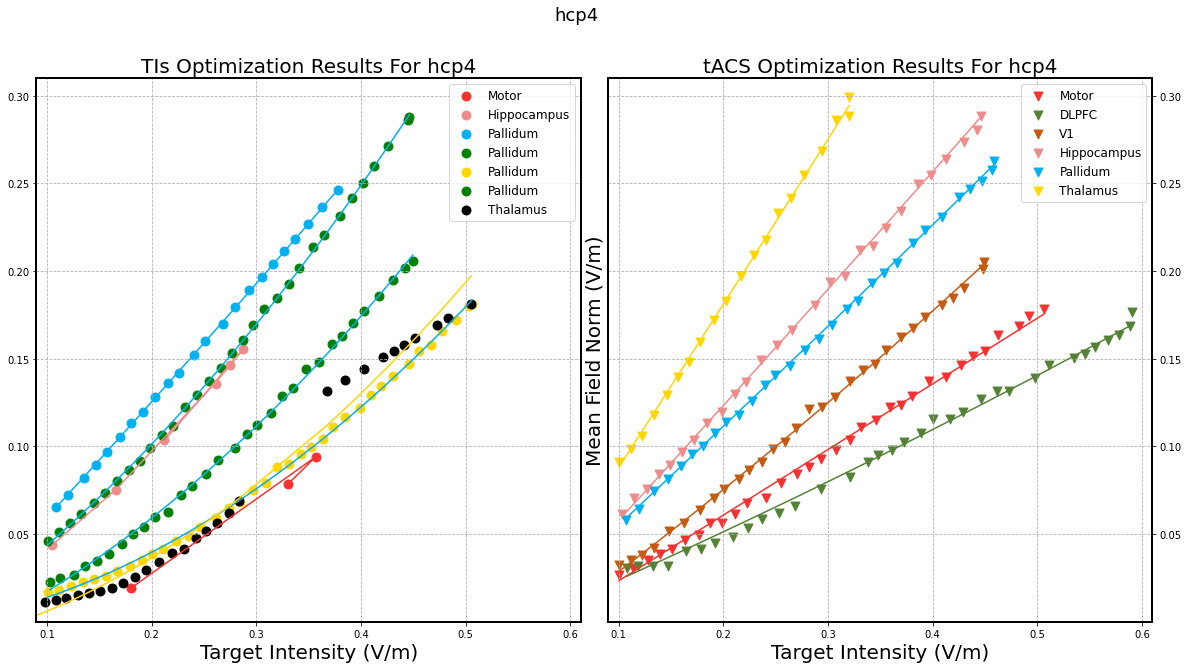

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from public import NDsort
GAP = 0.01
SIZE = 80
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index

from public import NDsort
def interp(fitness_,x = 3):
    # FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    # FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    # fitness_ = fitness_[FrontValue_1_index]
    
    fitness_[:,0] = 1/fitness_[:,0]
    for i in range(1,x):
        fitness_ = np.vstack((fitness_,fitness_*(40+i)/(x+41)))
    fitness_[:,0] = 1/fitness_[:,0]
    
    FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    fitness_ = fitness_[FrontValue_1_index]
    print(len(fitness_))
    return fitness_
    
def rank_dense(x):
    
    #print(x)
    length = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0 or i == len(x)-1:
            length[i] = 999
        else: 
            length[i] = x[i+1] - x[i-1]
    return -length
        
RES = 50
MODEL ='hcp4'
# for tacs img_txt is node == 1000,for ti img_txt/2
#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10))

plt.subplot(122)
gt_data = []
f2 = open(r"img_txt3/1102pareto_fitness_motor_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],1)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE, c='#F73030', marker='v', label='Motor' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#F73030')


gt_data = []
f2 = open(r"img_txt3/1102pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#548235', marker='v', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#548235')


gt_data = []
f2 = open(r"img_txt3/1102pareto_fitness_v1_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#C55A11', marker='v', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#C55A11')


gt_data = []
f2 = open(r"img_txt3/1102pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#ef8b8b', marker='v', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#ef8b8b')
#
#
gt_data = []
f2 = open(r"img_txt3/1102pareto_fitness_pallidum_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1],  c='#00b0f0', s=SIZE, marker='v', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#00b0f0')

#
#
gt_data = []
f2 = open(r"img_txt3/1102pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE, c='gold', marker='v', label='Thalamus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='gold')

#
plt.legend(loc='upper right', fontsize=12, markerscale=1)
plt.title('tACS Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度
plt.grid(True,linestyle = '--') # 不显示网格线

ax = plt.gca()
ax.yaxis.set_ticks_position('right')
# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)


#-----------------------------------------------#
plt.subplot(121)
gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_motor_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/wangmo/stimulation/geatpy/result of job 2022-11-03 14h-14m-55s/optPop/ObjV.csv", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# data = interp(data,3)
# index = np.argsort(1/data[:,0])

#data = data[index]
index = cal_rank(1/data[:,0],0.001)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#F73030', marker='o', label='Motor' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#F73030')



'''
gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#548235', marker='o', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#548235')


# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_v1_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_v1_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])

# data = data[index]
# index = cal_rank(1 / data[:,0],0.005)

# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='#C55A11', marker='o', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='#C55A11')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/intensity_pareto_fitness_v1_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_v1_hcp4.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#C55A11', marker='o', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#C55A11')

'''
#
gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/wangmo/stimulation/geatpy/result of job 2022-11-03 14h-15m-34s/optPop/ObjV.csv", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# data = interp(data,5)

# index = np.argsort(1/data[:,0])

# data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#ef8b8b', marker='o', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#ef8b8b')

#

gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"img_txt3/1104pareto_fitness_hippo_hcp2.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#00b0f0', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

gt_data =[ ]
f2 = open(r"img_txt3/1105pareto_fitness_v1_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='g', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

#
gt_data =[ ]
f2 = open(r"img_txt3/1105pareto_fitness_motor_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='gold', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='g', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

#
gt_data = []


    
f2 = open(r"/mnt/zfs-pool/wangmo/stimulation/geatpy/result of job 2022-11-05 13h-35m-27s/optPop/ObjV.csv", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)

data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='black', marker='o', label='Thalamus' ) #: '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='gold')


plt.legend(loc='upper right', fontsize=12, markerscale=1)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
#
plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)

# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)
# t.savefig(MODEL+'_mopso_r2.png')

plt.show()

197


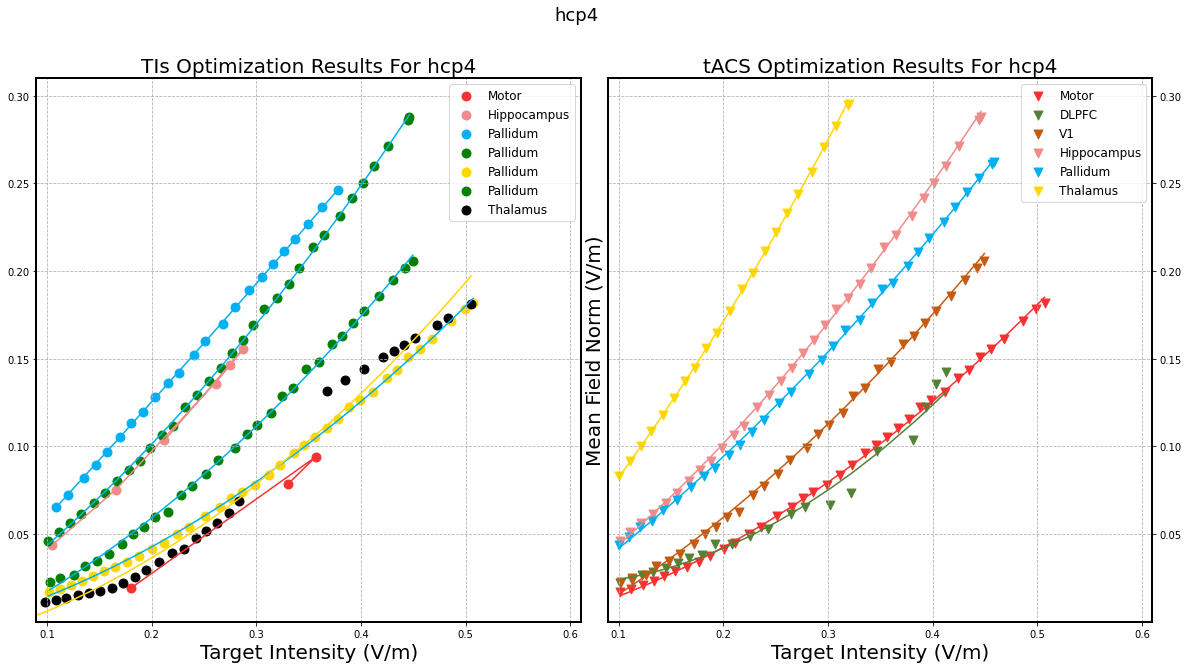

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from public import NDsort
GAP = 0.01
SIZE = 80
def cal_rank(x,gap):
    index = [0,len(x)-1]
    temp = x[0]
    for i in range(len(x)):
        if x[i] - temp > gap:
            index.append(i)
            temp = x[i]
    index = np.unique(index)
    return index

from public import NDsort
def interp(fitness_,x = 3):
    # FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    # FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    # fitness_ = fitness_[FrontValue_1_index]
    
    fitness_[:,0] = 1/fitness_[:,0]
    for i in range(1,x):
        fitness_ = np.vstack((fitness_,fitness_*(40+i)/(x+41)))
    fitness_[:,0] = 1/fitness_[:,0]
    
    FrontValue_1_index = NDsort.NDSort(fitness_, fitness_.shape[0])[0] == 1
    FrontValue_1_index = np.reshape(FrontValue_1_index,(-1,))
    fitness_ = fitness_[FrontValue_1_index]
    print(len(fitness_))
    return fitness_
    
def rank_dense(x):
    
    #print(x)
    length = np.zeros(len(x))
    for i in range(len(x)):
        if i == 0 or i == len(x)-1:
            length[i] = 999
        else: 
            length[i] = x[i+1] - x[i-1]
    return -length
        
RES = 50
MODEL ='hcp4'
# for tacs img_txt is node == 1000,for ti img_txt/2
#plt.figure(figsize=(20, 10), dpi=100)
t,sub = plt.subplots(2,1,figsize=(20, 10))

plt.subplot(122)
gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_motor_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE, c='#F73030', marker='v', label='Motor' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#F73030')


gt_data = []
#f2 = open(r"img_txt3/1105pareto_fitness_dlpfc_"+MODEL+".txt", "r")

f2 = open(r"temp.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#548235', marker='v', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))

p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#548235')


gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_v1_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#C55A11', marker='v', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#C55A11')


gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_hippo_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE,  c='#ef8b8b', marker='v', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#ef8b8b')
#
#
gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_pallidum_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1],  c='#00b0f0', s=SIZE, marker='v', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='#00b0f0')

#
#
gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_thalamus_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)
index1 = np.argsort(1/data[:,0])
#print(1 / data[index1, 0])
index = cal_rank(1 / data[index1, 0],GAP)
parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)

plt.scatter(1/data[index1[index], 0], data[index1[index], 1], s=SIZE, c='gold', marker='v', label='Thalamus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index1,0],p(1/data[index1,0]),c='gold')

#
plt.legend(loc='upper right', fontsize=12, markerscale=1)
plt.title('tACS Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度
plt.grid(True,linestyle = '--') # 不显示网格线

ax = plt.gca()
ax.yaxis.set_ticks_position('right')
# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)


#-----------------------------------------------#
plt.subplot(121)
gt_data = []

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_motor_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/wangmo/stimulation/geatpy/result of job 2022-11-03 14h-14m-55s/optPop/ObjV.csv", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# data = interp(data,3)
# index = np.argsort(1/data[:,0])

#data = data[index]
index = cal_rank(1/data[:,0],0.001)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
#plt.scatter(1/data[index, 0], data[index, 1],  c='#F73030', marker='1', label='Motor : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#F73030', marker='o', label='Motor' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X+'+str(np.around(parameter[1],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#F73030')



'''
gt_data = []

f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_dlpfc_"+MODEL+".txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#548235', marker='o', label='DLPFC' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#548235')


# gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_v1_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/pareto_fitness_v1_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)
# index = np.argsort(1/data[:,0])

# data = data[index]
# index = cal_rank(1 / data[:,0],0.005)

# parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
# plt.scatter(1/data[index, 0], data[index, 1], s=30,  c='#C55A11', marker='o', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
# p = np.poly1d(parameter)
# plt.plot(1/data[index,0],p(1/data[index,0]),c='#C55A11')

gt_data = []
f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt_ti/intensity_pareto_fitness_v1_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_focality2/avoid4_pareto_fitness_v1_hcp4.txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
# data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#C55A11', marker='o', label='V1' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#C55A11')

'''
#
gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_hippo_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"/mnt/zfs-pool/wangmo/stimulation/geatpy/result of job 2022-11-03 14h-15m-34s/optPop/ObjV.csv", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

# data = interp(data,5)

# index = np.argsort(1/data[:,0])

# data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#ef8b8b', marker='o', label='Hippocampus' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#ef8b8b')

#

gt_data = []
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
# f2 = open(r"/mnt/zfs-pool/tes/ti/mopso/img_txt3/pareto_fitness_pallidum_"+MODEL+".txt", "r")
# lines = f2.readlines()
# for line3 in lines:
#     #print(line3)
#     cur = line3.strip().split(" ")
#     cur = list(map(float, cur))
#     gt_data.append(cur)
    
f2 = open(r"img_txt3/1104pareto_fitness_hippo_hcp2.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='#00b0f0', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

gt_data =[ ]
f2 = open(r"img_txt3/1105pareto_fitness_v1_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='g', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

#
gt_data =[ ]
f2 = open(r"img_txt3/1105pareto_fitness_motor_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='gold', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

gt_data = []
f2 = open(r"img_txt3/1105pareto_fitness_hippo_hcp4.txt", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(" ")
    cur = list(map(float, cur))
    gt_data.append(cur)
data = np.array(gt_data)

#data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='g', marker='o', label='Pallidum' ) # : '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='#00b0f0')

#
gt_data = []


    
f2 = open(r"/mnt/zfs-pool/wangmo/stimulation/geatpy/result of job 2022-11-05 13h-35m-27s/optPop/ObjV.csv", "r")
lines = f2.readlines()
for line3 in lines:
    #print(line3)
    cur = line3.strip().split(",")
    cur = list(map(float, cur))
    gt_data.append(cur)

data = np.array(gt_data)

data = interp(data,5)

index = np.argsort(1/data[:,0])

data = data[index]
index = cal_rank(1 / data[:,0],0.01)

parameter = np.polyfit(1 / data[index, 0],data[index, 1],2)
plt.scatter(1/data[index, 0], data[index, 1], s=SIZE,  c='black', marker='o', label='Thalamus' ) #: '+ str(np.around(parameter[0],decimals=2))+'*X^2'+str(np.around(parameter[1],decimals=2))+'*X+'+str(np.around(parameter[2],decimals=2)))
p = np.poly1d(parameter)
plt.plot(1/data[index,0],p(1/data[index,0]),c='gold')


plt.legend(loc='upper right', fontsize=12, markerscale=1)
plt.title('TIs Optimization Results For '+MODEL,fontsize=20)
plt.rcParams.update({'font.size': 15})
plt.xlabel('Target Intensity (V/m)',fontsize=20)
#plt.ylabel('Mean Field Norm (V/m)',fontsize=20)  # y 轴名称旋转 38 度

plt.grid(True,linestyle = '--') # 不显示网格线
ax = plt.gca()
ax.yaxis.set_ticks_position('left')
#
plt.xlim(0.09, 0.61, 0.1)
plt.xticks(np.arange(0.1, 0.61, 0.1),size =10)
plt.ylim(0, 0.31, 0.05)
plt.yticks(np.arange(0.05, 0.31, 0.05),size =10)

# ax.spines['right'].set_color('#ccc')
# ax.spines['top'].set_color('#ccc')
# ax.spines['left'].set_color('#ccc')
# ax.spines['bottom'].set_color('#ccc')
# # 设置图像的边框粗细程度
ax.spines['right'].set_linewidth('2.0')
ax.spines['top'].set_linewidth('2.0')
ax.spines['left'].set_linewidth('2.0')
ax.spines['bottom'].set_linewidth('2.0')

t.subplots_adjust(wspace = 0.05)
t.suptitle(MODEL)
# t.savefig(MODEL+'_mopso_r2.png')

plt.show()